## This file contains workup for the manuscript figures

Some of the figures use calculations from outside of TiDES (NWChem, pyscf.md, etc.)

The lines that do so are commented out, so that figures can be prepared just by running the TiDES calculations.

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, MaxNLocator
import matplotlib.patches as mpatches
from tides.rt_spec import abs_spec
from tides.parse_rt import parse_output, get_length
from pyscf import lib
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 0.75
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 0.75
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['legend.facecolor'] = 'None'
mpl.rcParams['legend.edgecolor'] = 'k'

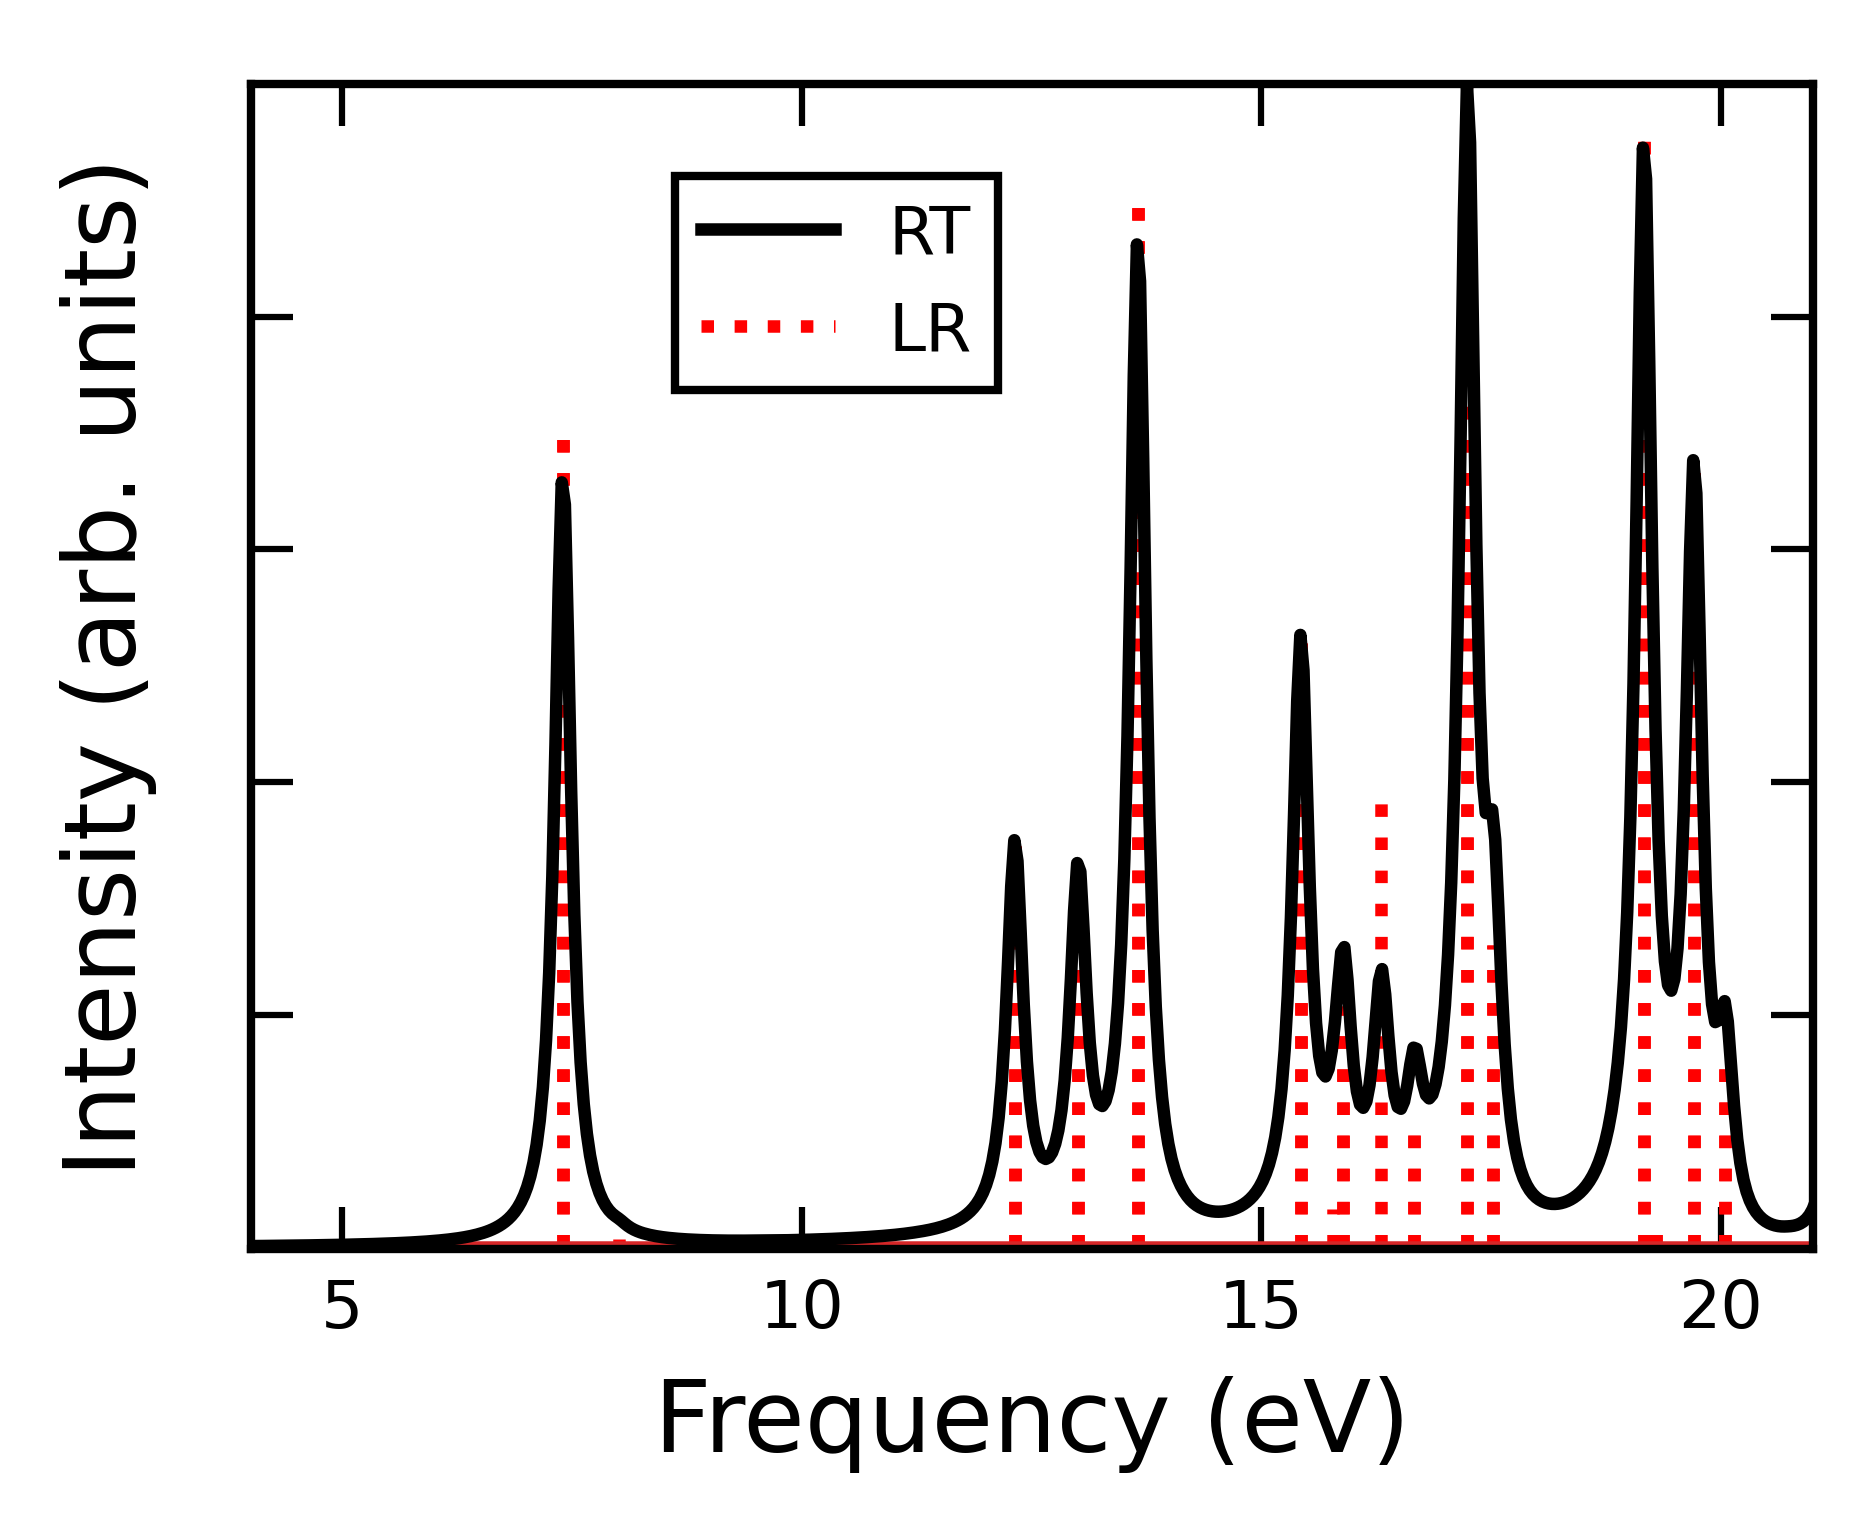

In [24]:
def benzene():
    xfilename = 'TiDES_OUTPUTS/UV-Vis/x/benzene.out'
    xresult = parse_output(xfilename)
    time = xresult['time']
    xdipole = xresult['dipole'][:,0]
    yfilename = 'TiDES_OUTPUTS/UV-Vis/y/benzene.out'
    yresult = parse_output(yfilename)
    time = yresult['time'][:]
    ydipole = yresult['dipole'][:,1]
    zfilename = 'TiDES_OUTPUTS/UV-Vis/z/benzene.out'
    zresult = parse_output(zfilename)
    time = zresult['time'][:]
    zdipole = zresult['dipole'][:,2]

    dipole = np.stack((xdipole, ydipole, zdipole)).T
    freq, intensity = abs_spec(time, dipole, kick_str=0.0001, damp=250, preprocess_zero=True)
    # Normalize so that highest visible peak has intensity of 1
    xmax = 750 
    freq = freq[:xmax] * 27.2114
    intensity = np.sum(intensity[:xmax,:], axis=1)
    intensity /= intensity.max()

    #lr_energies = np.loadtxt('SUPPLEMENTAL_OUTPUTS/LRTDDFT/energies.txt')
    #lr_intensity = np.loadtxt('SUPPLEMENTAL_OUTPUTS/LRTDDFT/osc_strengths.txt')
    #lr_intensity /= lr_intensity.max()
    plt.figure(figsize=(3.36, 2.52), dpi=600)
    ax = plt.axes()
    ax.tick_params(labelsize=8, which='both',direction='in', top=True, right=True)
    ax.xaxis.set_major_locator(MultipleLocator(5))
    #plt.stem(lr_energies*27.2114, lr_intensity, linefmt='r:', markerfmt='')

    plt.plot(freq, intensity, 'k', linewidth=1.5, label='RT')
    #plt.plot([0], [0], 'r:', label='LR') # Just for the legend tag w/out the weird stem line
    plt.xlabel('Frequency (eV)', fontsize=12)
    plt.ylabel('Intensity (arb. units)', fontsize=12, labelpad=-5)
    plt.yticks(c='w')
    plt.xlim([4,21])
    plt.ylim([-0.001,1.0])
    plt.legend(fontsize=8, loc='upper center', bbox_to_anchor=(0.375, .95), fancybox=False, framealpha=1., edgecolor='inherit')
    #plt.savefig('PNG_OUTPUTS/Benzene_UV-Vis.png', bbox_inches='tight')

benzene()

In [4]:
#def NWCHEM(direction, dipole_position):
#    '''
#    Parses dipole from .nwo file.
#    dipole_position should be 2 for x dipole, 3 for y dipole, 4 for z dipole
#    '''
#    with open(direction+'/co.nwo', 'r') as f:
#        lines = f.readlines()

#    time = []
#    dipole = []
#    for line in lines:
#        if '# Dipole moment [system]' in line:
#            time.append(float(line.split()[1]))
#            dipole.append(float(line.split()[dipole_position]))

#    return np.array(time), np.array(dipole)
    
xmax = 2000 * 50 # Spectrum generated using max simulation time of 2000 au
PySCFx = parse_output('TiDES_OUTPUTS/XAS/x/co.out')
PySCF_dipolex = PySCFx['dipole'][:xmax,0]
PySCFy = parse_output('TiDES_OUTPUTS/XAS/y/co.out')
PySCF_dipoley = PySCFy['dipole'][:xmax,1]
PySCFz = parse_output('TiDES_OUTPUTS/XAS/z/co.out')
PySCF_time, PySCF_dipolez = PySCFz['time'][:xmax], PySCFz['dipole'][:xmax,2]
#_, NWCHEM_dipolex = NWCHEM('SUPPLEMENTAL_OUTPUTS/NWCHEM_XAS/x', 2)
#_, NWCHEM_dipoley = NWCHEM('SUPPLEMENTAL_OUTPUTS/NWCHEM_XAS/y', 3)
#NWCHEM_time, NWCHEM_dipolez = NWCHEM('SUPPLEMENTAL_OUTPUTS/NWCHEM_XAS/z', 4)

#NWCHEM_time, NWCHEM_dipolex, NWCHEM_dipoley, NWCHEM_dipolez = (NWCHEM_time[:xmax], NWCHEM_dipolex[:xmax], 
#NWCHEM_dipoley[:xmax], NWCHEM_dipolez[:xmax])

PySCF_dipole = np.stack((PySCF_dipolex, PySCF_dipoley, PySCF_dipolez)).T
#NWCHEM_dipole = np.stack((NWCHEM_dipolex, NWCHEM_dipoley, NWCHEM_dipolez)).T
    
PySCF_freq, PySCF_intensity = abs_spec(PySCF_time, PySCF_dipole, kick_str=0.01, damp=120, preprocess_zero=True)
PySCF_freq = PySCF_freq * 27.2114
PySCF_intensity = np.sum(PySCF_intensity, axis=1)

#NWCHEM_freq, NWCHEM_intensity = abs_spec(NWCHEM_time, NWCHEM_dipole, kick_str=0.01, damp=120, preprocess_zero=True)
#NWCHEM_freq = NWCHEM_freq * 27.2114
#NWCHEM_intensity = np.sum(NWCHEM_intensity, axis=1)

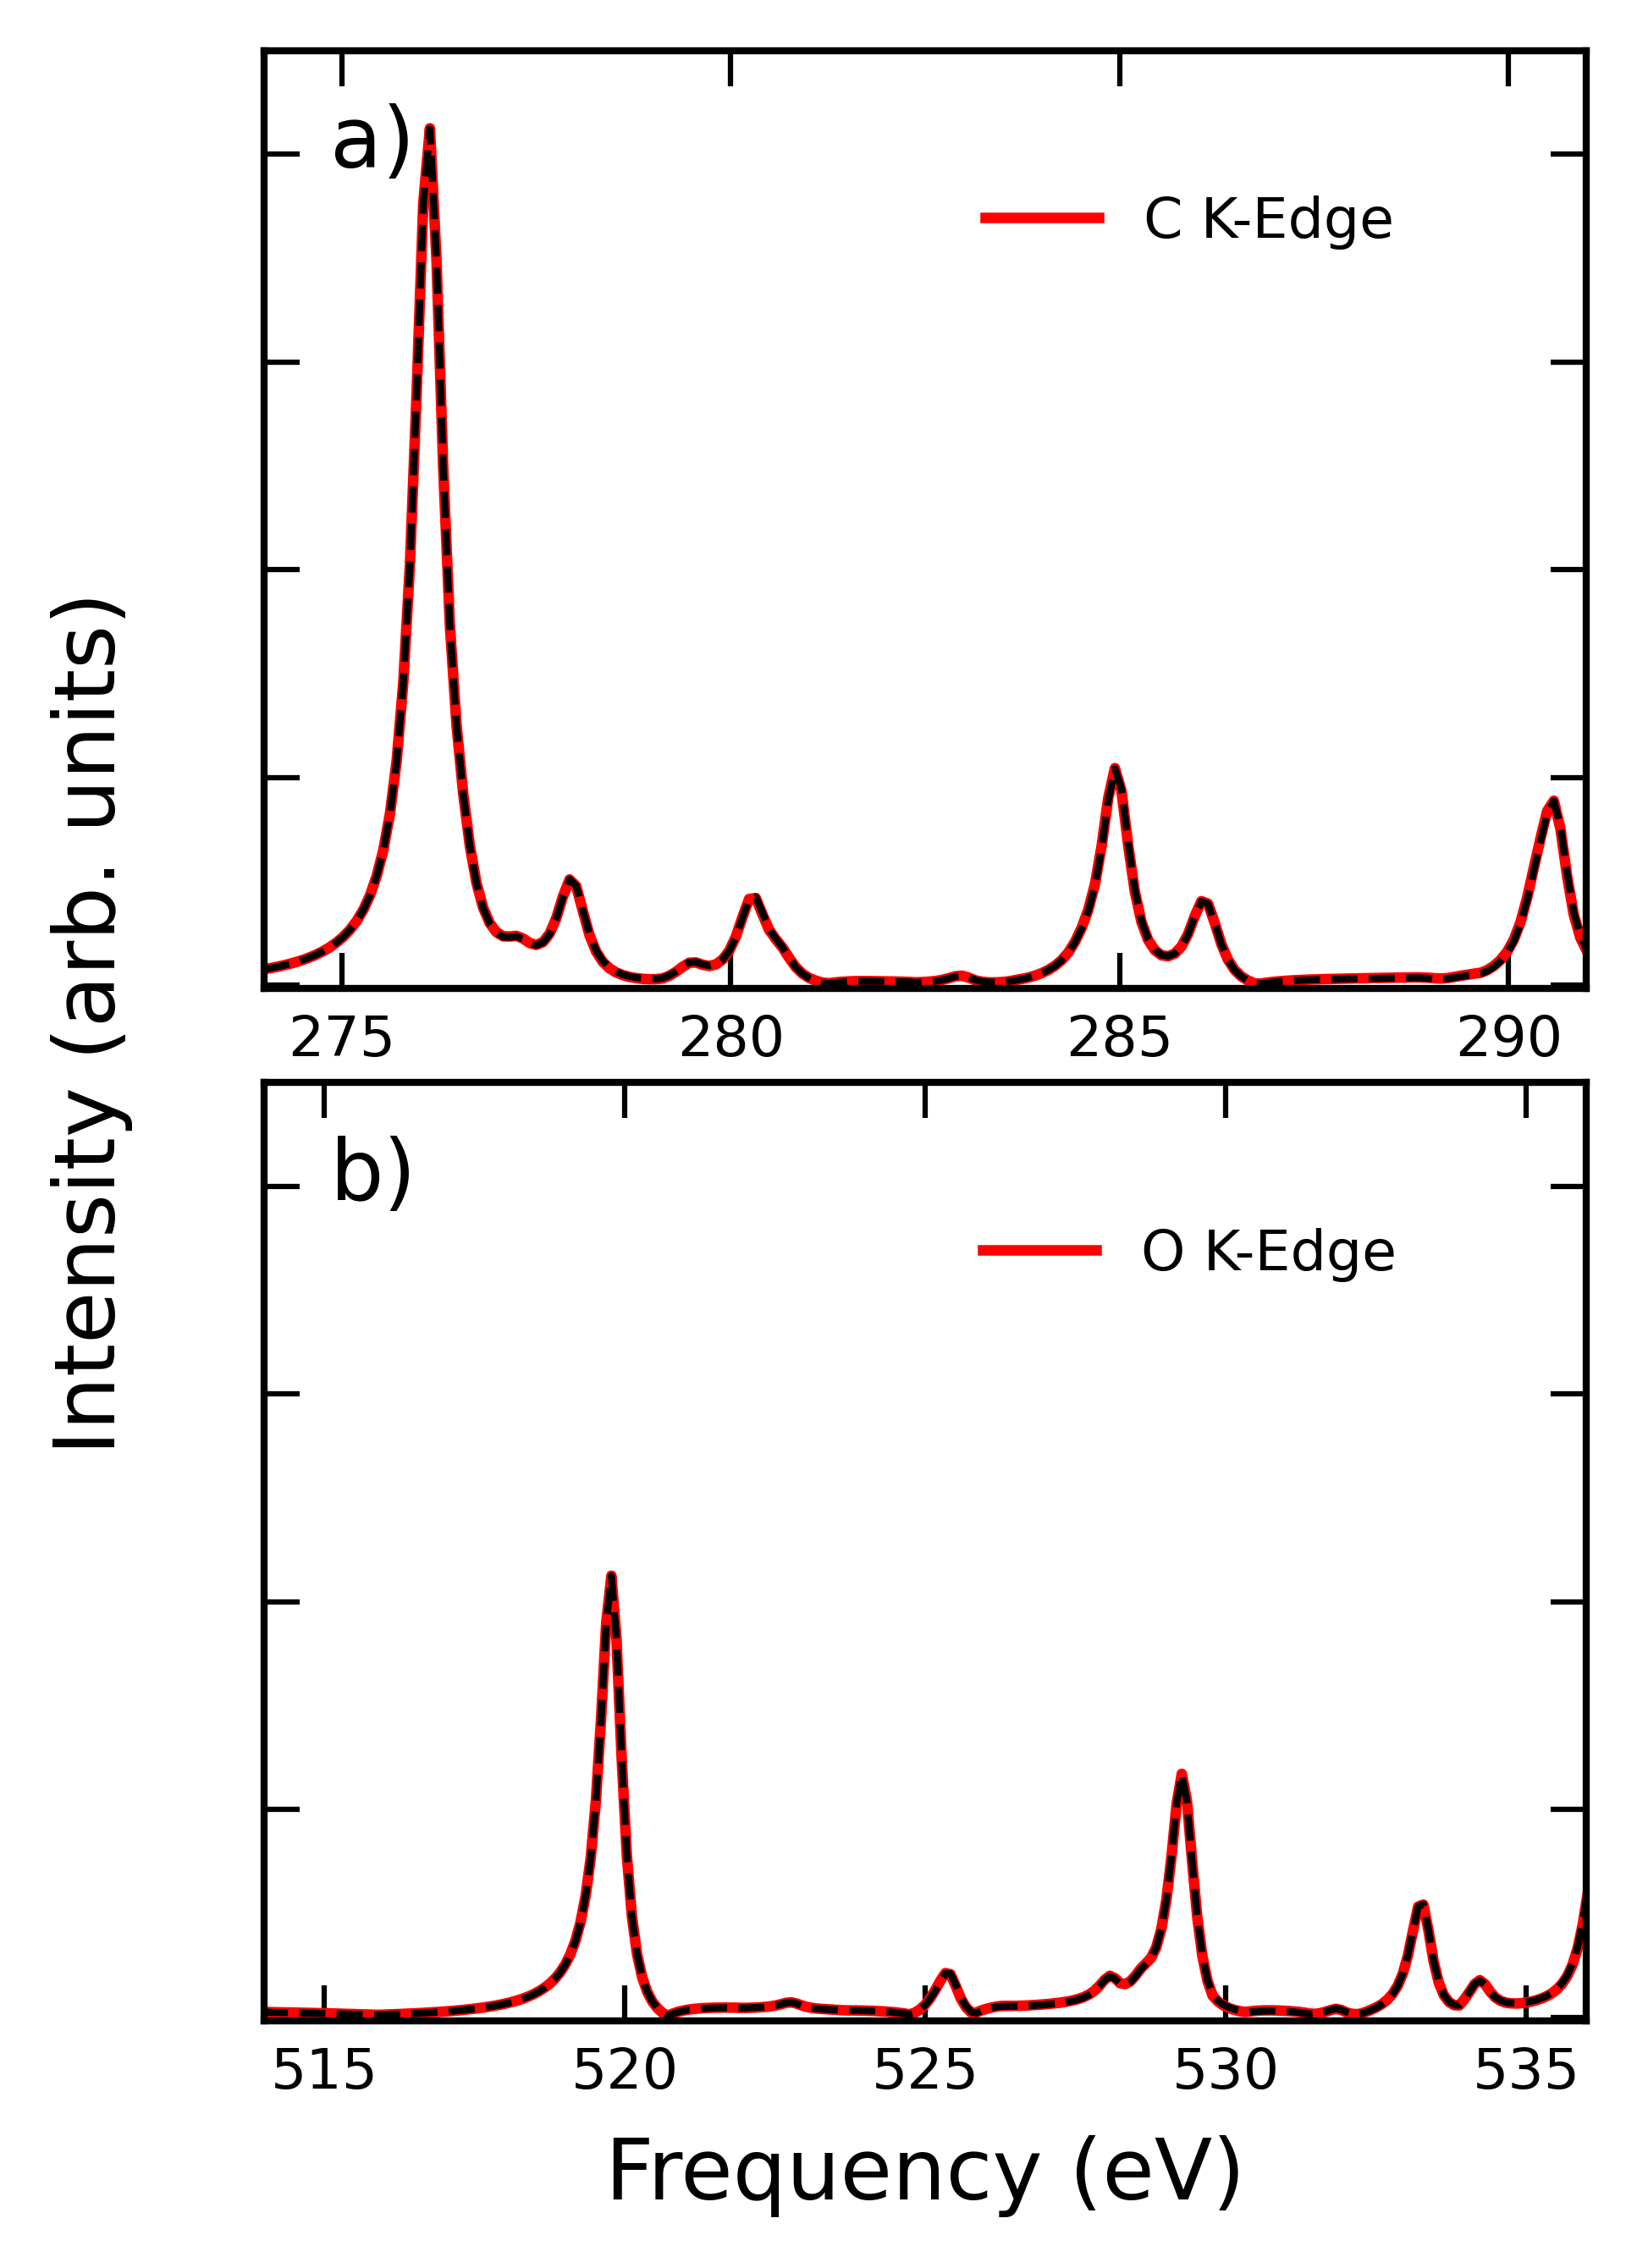

In [26]:
def co_xas():    
    fig, axs = plt.subplots(2,1, figsize=(3.36, 2.52*2), dpi=600, sharex=False)
    plt.subplots_adjust(hspace=0.1)
    axs[0].tick_params(labelsize=8, which='both',direction='in', top=True, right=True)
    axs[0].plot(PySCF_freq, PySCF_intensity, 'r', linewidth=1.5, label='C K-Edge') # + 11.4
    #axs[0].plot(NWCHEM_freq, NWCHEM_intensity, 'k', linestyle='dashed', linewidth=1.0) # + 11.4
    axs[0].yaxis.set_major_locator(MultipleLocator(.8/3))
    axs[0].xaxis.set_major_locator(MultipleLocator(5))
    axs[0].set_yticklabels([])
    axs[0].set_xlim([274,291])
    axs[0].set_ylim([-0.005,1.2])
    axs[0].text(0.05, 0.9, 'a)', fontsize=12, va='center', transform=axs[0].transAxes)
    axs[0].legend(fontsize=8, loc='upper center', bbox_to_anchor=(0.7, 0.9), frameon=False, edgecolor='inherit')
    
    axs[1].tick_params(labelsize=8, which='both',direction='in', top=True, right=True)
    axs[1].plot(PySCF_freq, PySCF_intensity, 'r', linewidth=1.5, label='O K-Edge') # + 14.6
    #axs[1].plot(NWCHEM_freq, NWCHEM_intensity, 'k', linestyle='dashed', linewidth=1.0) # + 14.6
    axs[1].yaxis.set_major_locator(MultipleLocator(0.8/3))
    axs[1].xaxis.set_major_locator(MultipleLocator(5))
    axs[1].set_xlabel('Frequency (eV)', fontsize=12, labelpad=5)
    axs[1].set_yticklabels([])
    axs[1].set_xlim([514,536])
    axs[1].set_ylim([-0.005,1.2])
    axs[1].text(0.05, 0.9, 'b)', fontsize=12, va='center', transform=axs[1].transAxes)
    axs[1].legend(fontsize=8, loc='upper center', bbox_to_anchor=(0.7, 0.9), frameon=False, edgecolor='inherit')
    fig.text(-0.0, 0.5, r'Intensity (arb. units)', fontsize=12, va='center', rotation='vertical')
    #plt.savefig('PNG_OUTPUTS/CO_XAS.png', bbox_inches='tight')

co_xas()

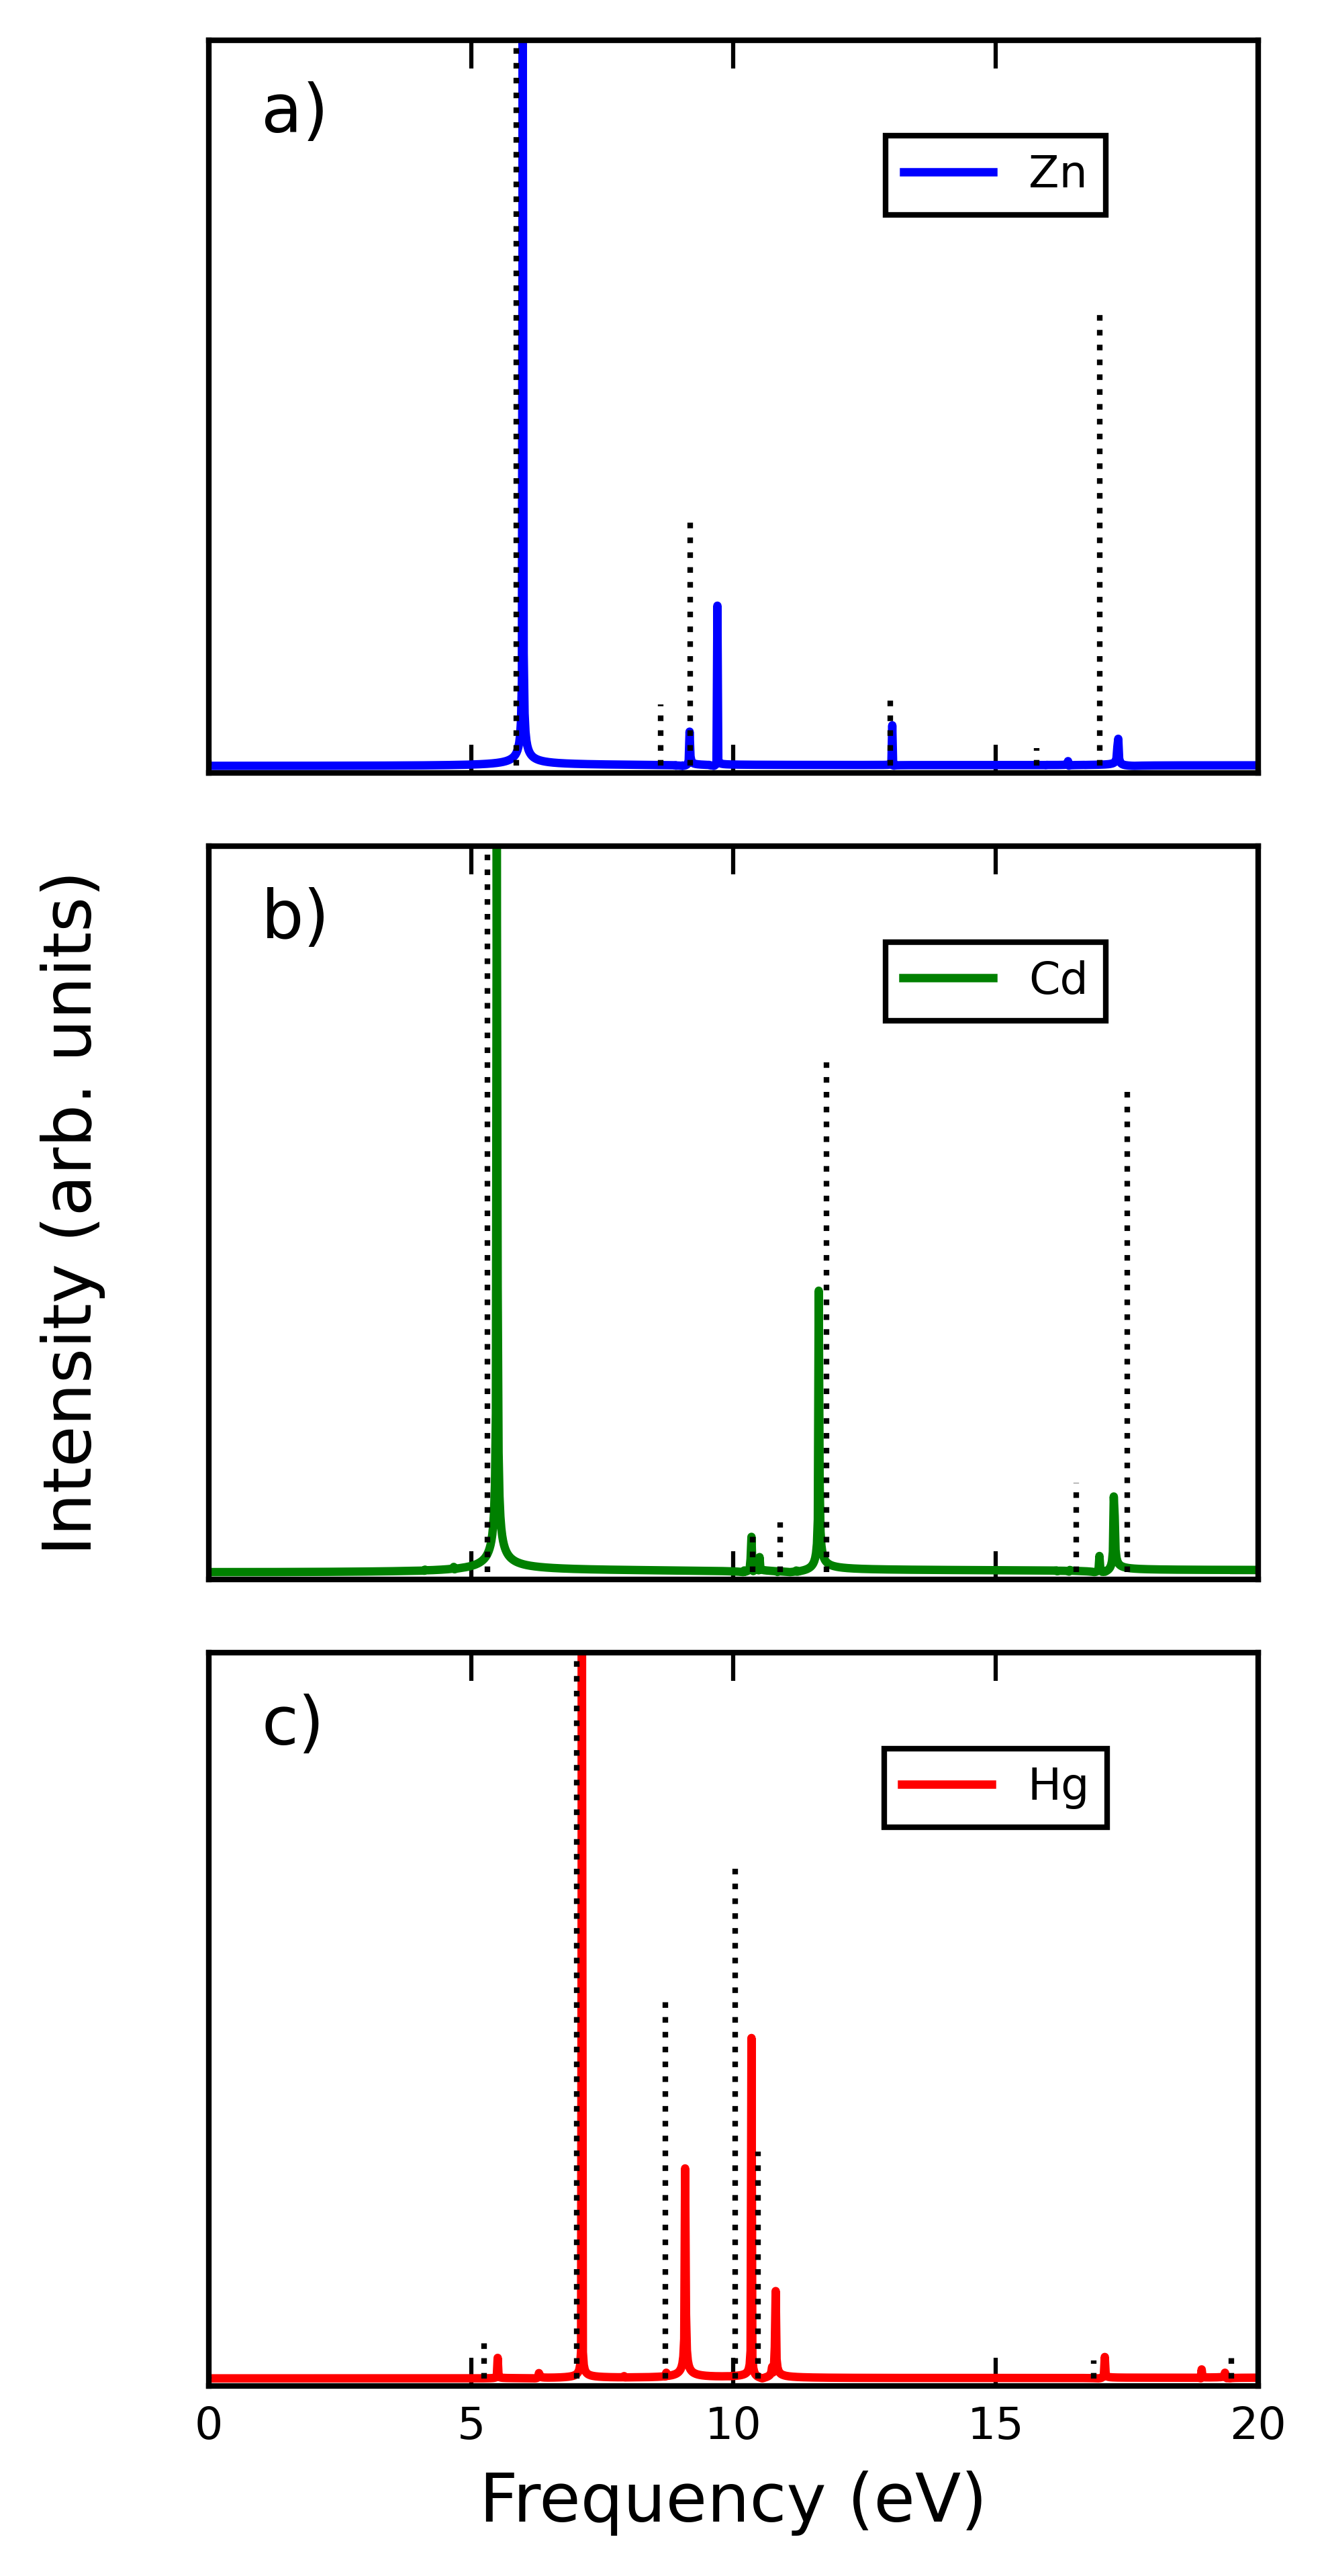

In [27]:
def Group12_X2C():
    filename = 'TiDES_OUTPUTS/X2C1e/Zn/zn.out'
    result = parse_output(filename)
    zn_time = result['time'][:]
    zn_dipole = result['dipole'][:,:]

    filename = 'TiDES_OUTPUTS/X2C1e/Cd/cd.out'
    result = parse_output(filename)
    cd_time = result['time'][:]
    cd_dipole = result['dipole'][:,:]

    filename = 'TiDES_OUTPUTS/X2C1e/Hg/hg.out'
    result = parse_output(filename)
    hg_time = result['time'][:]
    hg_dipole = result['dipole'][:,:]

    zn_freq, zn_intensity = abs_spec(zn_time, zn_dipole, kick_str=0.0001, damp=0, preprocess_zero=True)
    zn_freq = zn_freq * 27.2114
    zn_intensity = zn_intensity[:,0]
    zn_intensity /= np.max(zn_intensity[:1200]) # Normalize
    
    cd_freq, cd_intensity = abs_spec(cd_time, cd_dipole, kick_str=0.0001, damp=0, preprocess_zero=True)
    cd_freq = cd_freq * 27.2114
    cd_intensity = cd_intensity[:,0]
    cd_intensity /= np.max(cd_intensity[:1200]) # Normalize

    hg_freq, hg_intensity = abs_spec(hg_time, hg_dipole, kick_str=0.0001, damp=0, preprocess_zero=True)
    hg_freq = hg_freq * 27.2114
    hg_intensity = hg_intensity[:,0]
    hg_intensity /= np.max(hg_intensity[:1200]) # Normalize
    
    def load_csv(file):
        data = np.loadtxt(file, delimiter=',')

        data[:,0] -= np.min(data[:,0])
        data[:,0] /= np.max(data[:,0])
        data[:,0] *= 20
        data[:,1] -= np.min(data[:,1])
        data[:,1] /= np.max(data[:,1])
        return data

    #zn_original = load_csv('SUPPLEMENTAL_OUTPUTS/zn_x2c.csv')
    #cd_original = load_csv('SUPPLEMENTAL_OUTPUTS/cd_x2c.csv')
    #hg_original = load_csv('SUPPLEMENTAL_OUTPUTS/hg_x2c.csv')
    
    fig, axs = plt.subplots(3,1, figsize=(3.36, 2.52*3), dpi=600, sharex=True)
    plt.subplots_adjust(hspace=0.1)
    axs[0].tick_params(labelsize=8, which='both',direction='in', top=True, right=True)
    axs[0].plot(zn_freq, zn_intensity, 'b', linewidth=1.5, label='Zn')
    #_, stem, base = axs[0].stem(zn_original[:,0], zn_original[:,1], linefmt='k:', markerfmt='', basefmt='')
    #stem.set_linewidth(1.0)
    #base.set_linewidth(0.0)
    axs[0].yaxis.set_major_locator(MultipleLocator(800/3))
    axs[0].set_yticklabels([])
    axs[0].set_xlim([0,20])
    axs[0].set_ylim([-0.01,1.0])
    axs[0].text(0.05, 0.9, 'a)', fontsize=12, va='center', transform=axs[0].transAxes)
    axs[0].legend(fontsize=8, loc='upper center', bbox_to_anchor=(0.75, 0.9), fancybox=False, framealpha=1., edgecolor='inherit')
    
    axs[1].tick_params(labelsize=8, which='both',direction='in', top=True, right=True)
    axs[1].plot(cd_freq, cd_intensity, 'g', linewidth=1.5, label='Cd')
    #_, stem, base = axs[1].stem(cd_original[:,0], cd_original[:,1], linefmt='k:', markerfmt='', basefmt='')
    #stem.set_linewidth(1.0)
    #base.set_linewidth(0.0)
    axs[1].yaxis.set_major_locator(MultipleLocator(500/3))
    axs[1].set_ylabel('Intensity (arb. units)', fontsize=12, labelpad=15)
    axs[1].set_yticklabels([])
    axs[1].set_xlim([0,20])
    axs[1].set_ylim([-0.01,1.0])
    axs[1].text(0.05, 0.9, 'b)', fontsize=12, va='center', transform=axs[1].transAxes)
    axs[1].legend(fontsize=8, loc='upper center', bbox_to_anchor=(0.75, 0.9), fancybox=False, framealpha=1., edgecolor='inherit')

    axs[2].tick_params(labelsize=8, which='both',direction='in', top=True, right=True)
    axs[2].plot(hg_freq, hg_intensity, 'r', linewidth=1.5, label='Hg')
    #_, stem, base = axs[2].stem(hg_original[:,0], hg_original[:,1], linefmt='k:', markerfmt='', basefmt='')
    #stem.set_linewidth(1.0)
    #base.set_linewidth(0.0)
    axs[2].yaxis.set_major_locator(MultipleLocator(350/3))
    axs[2].set_xlabel('Frequency (eV)', fontsize=12)
    axs[2].set_yticklabels([])
    axs[2].set_xlim([0,20])
    axs[2].set_ylim([-0.01,1.0])
    axs[2].text(0.05, 0.9, 'c)', fontsize=12, va='center', transform=axs[2].transAxes)
    axs[2].legend(fontsize=8, loc='upper center', bbox_to_anchor=(0.75, 0.9), fancybox=False, framealpha=1., edgecolor='inherit')
    #plt.savefig('PNG_OUTPUTS/Group12_X2C.png', bbox_inches='tight')
    
Group12_X2C()

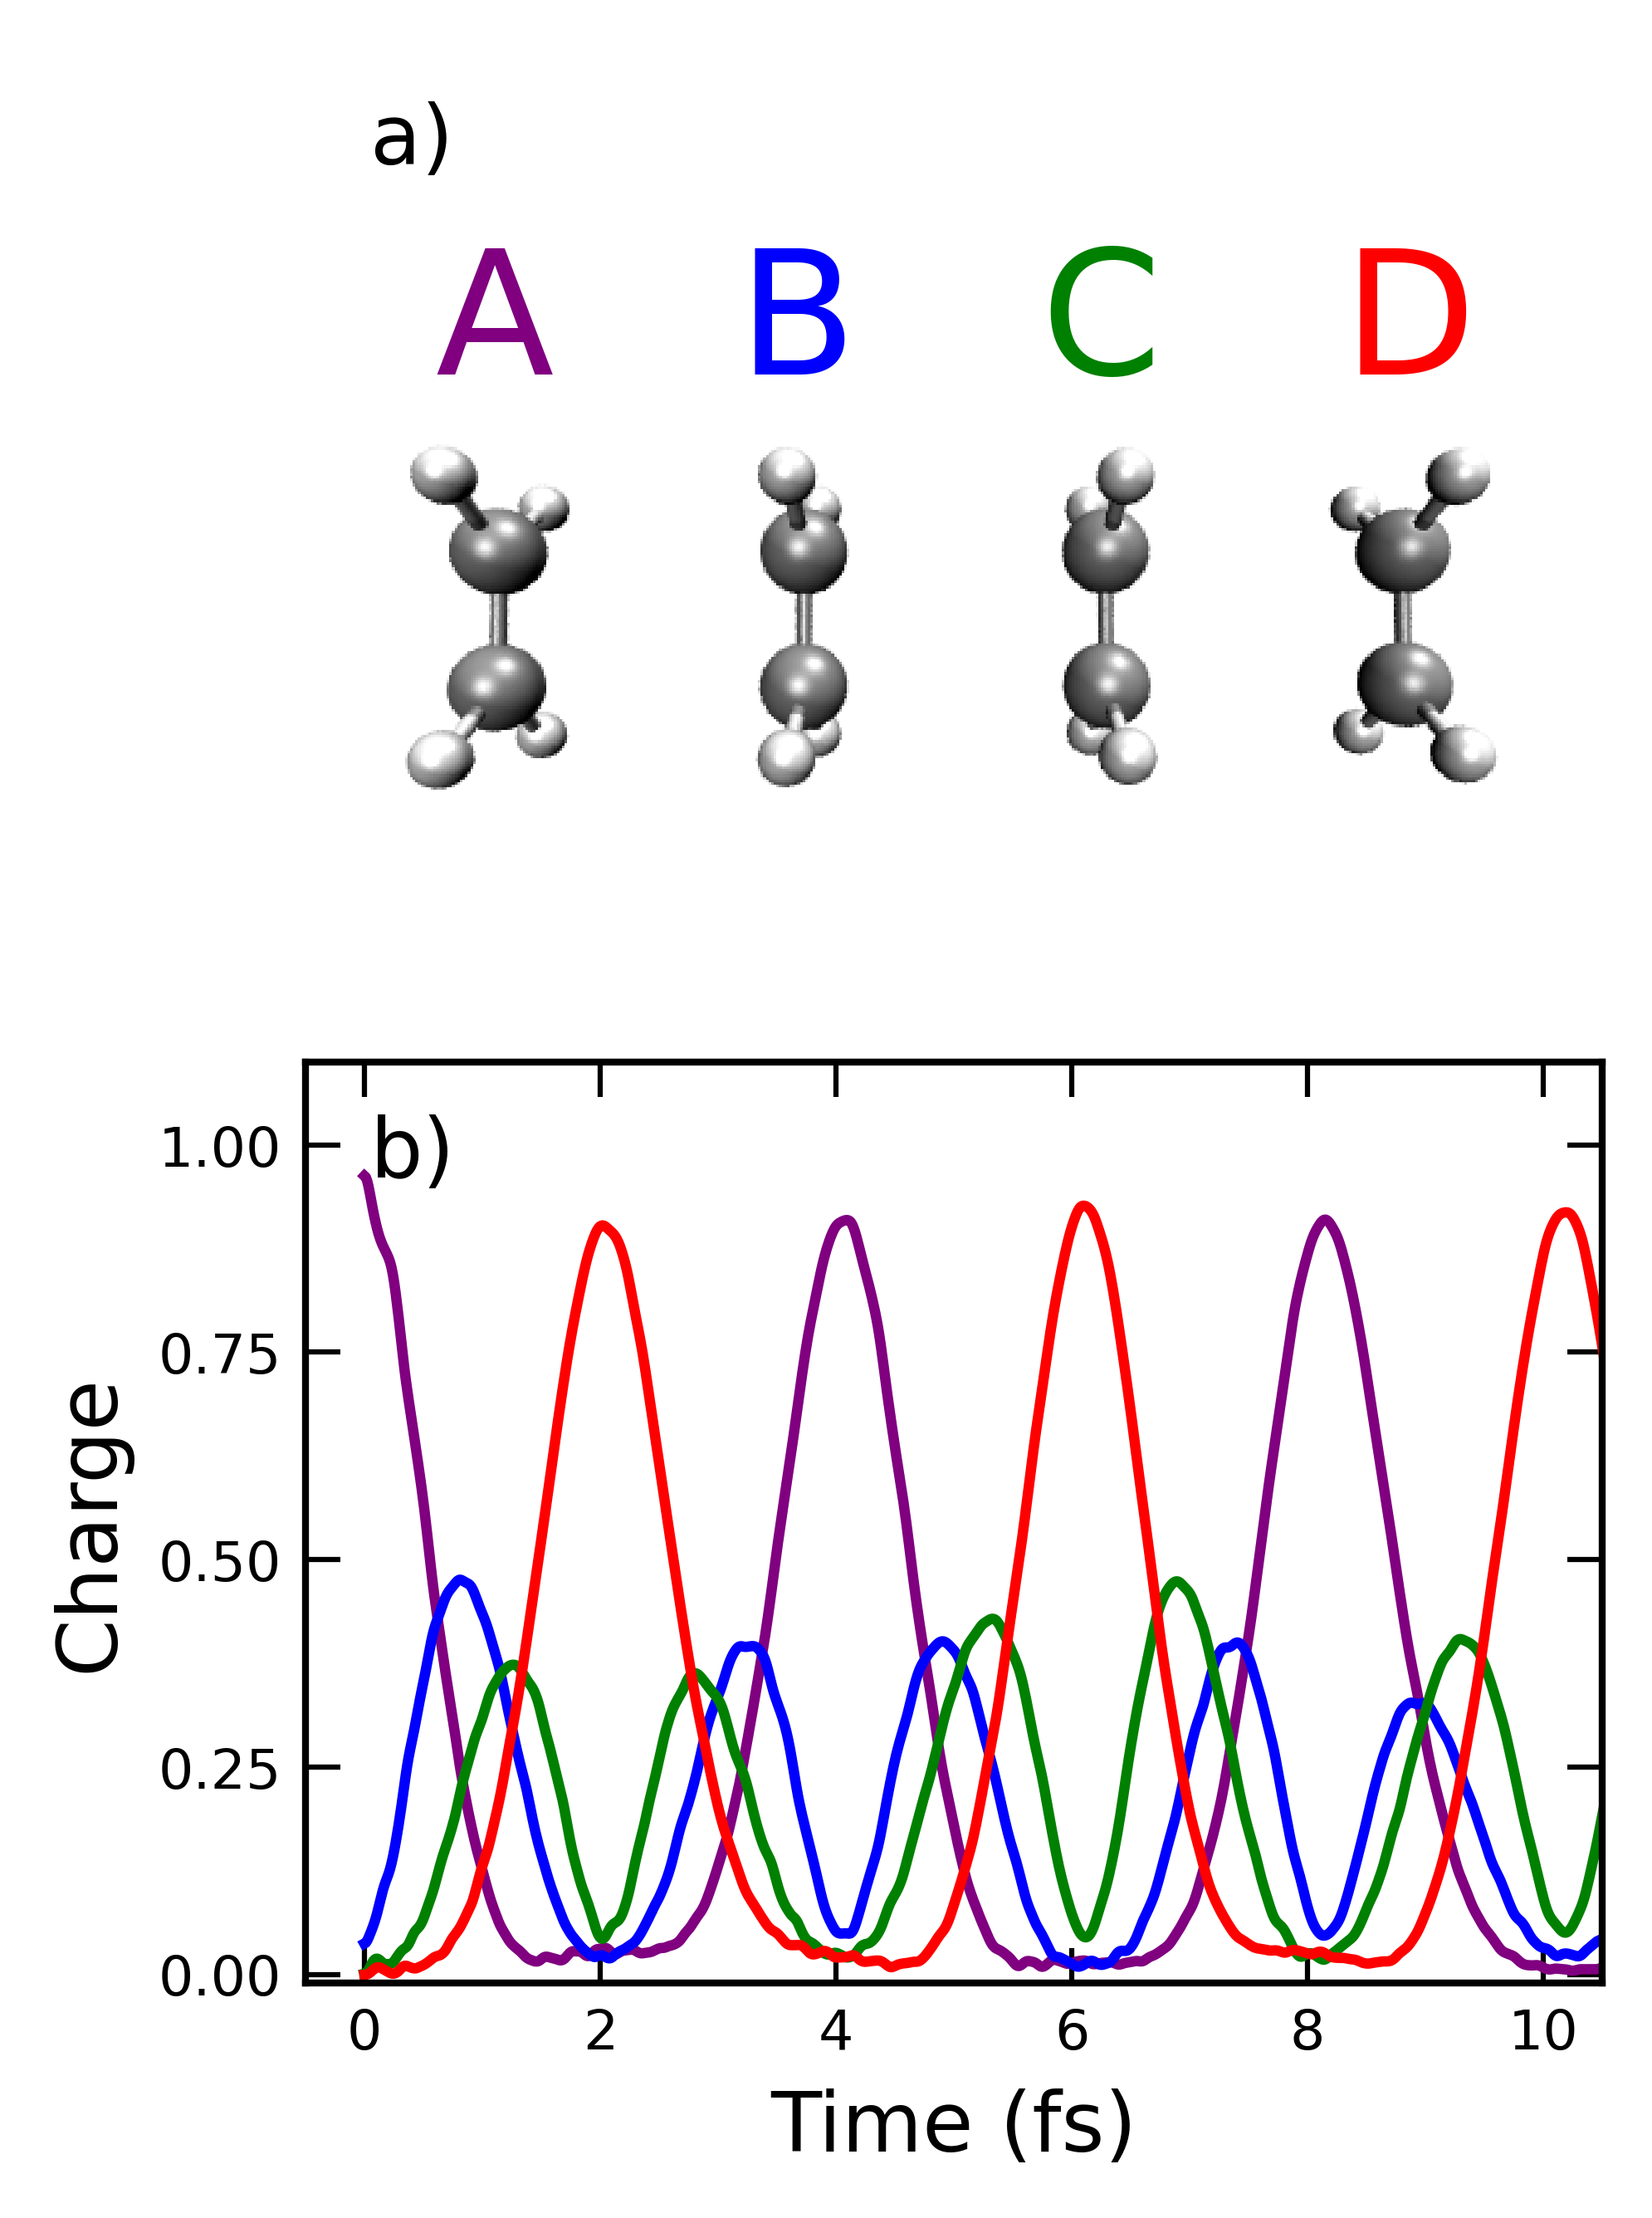

In [28]:
def EthyleneStack():
    filename = 'TiDES_OUTPUTS/ChargeMigration/ethylene_x4.out'
    result = parse_output(filename)
    time = result['time']
    hirsh_charges = result['hirsh_charge']
    a_charge = hirsh_charges[:,:6].sum(axis=1)
    b_charge = hirsh_charges[:,6:12].sum(axis=1)
    c_charge = hirsh_charges[:,12:18].sum(axis=1)
    d_charge = hirsh_charges[:,18:].sum(axis=1)
    
    fig, axs = plt.subplots(2,1, figsize=(3.36, 2.52*2), dpi=600, sharex=False)
    plt.subplots_adjust(hspace=0.1)
    axs[0].tick_params(labelsize=8, top=False, bottom=False, left=False, right=False)
    axs[0].tick_params(left=False, bottom=False, top=False, right=False)
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['bottom'].set_visible(False)
    axs[0].spines['left'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    
    axs[0].text(.1, 0.7, 'A', c='purple', fontsize=25, va='center')
    axs[0].text(.1+0.7/3, 0.7, 'B', c='blue', fontsize=25, va='center')
    axs[0].text(.1+1.4/3, 0.7, 'C', c='green', fontsize=25, va='center')
    axs[0].text(.8, 0.7, 'D', c='red', fontsize=25, va='center')
    axs[0].text(0.05, 0.9, 'a)', fontsize=12, va='center', transform=axs[0].transAxes)
    #_image = plt.imread('PNG_INPUTS/Ethylene_blank.png', format='png')
    
    #axin = axs[0].inset_axes([0.,-0.15,1.,1.], transform=axs[0].transAxes)    # create new inset axes in data coordinates
    #axin.tick_params(left=False, bottom=False, top=False, right=False)
    #axin.set_xticks([])
    #axin.set_yticks([])
    
    #axin.spines['top'].set_visible(False)
    #axin.spines['bottom'].set_visible(False)
    #axin.spines['left'].set_visible(False)
    #axin.spines['right'].set_visible(False)
    
    #axin.imshow(_image)
    
    
    axs[1].tick_params(labelsize=8, which='both',direction='in', top=True, right=True)
    axs[1].yaxis.set_major_locator(MultipleLocator(0.25))
    axs[1].plot(time / 41.34, 16 - a_charge, 'purple', linewidth=1.5, label='A')
    axs[1].plot(time / 41.34, 16 - b_charge, 'blue', linewidth=1.5, label='B')
    axs[1].plot(time / 41.34, 16 - c_charge, 'green', linewidth=1.5, label='C')
    axs[1].plot(time / 41.34, 16 - d_charge, 'red', linewidth=1.5, label='D')
    #axs[1].legend(bbox_to_anchor=(0.5, .92), loc='center', ncol=4, frameon=False, fontsize=15)
    axs[1].set_xlim([-0.5,10.5])
    axs[1].set_ylim([-0.01, 1.1])
    axs[1].set_ylabel('Charge', fontsize=12)
    axs[1].set_xlabel('Time (fs)', fontsize=12)
    axs[1].text(0.05, 0.9, 'b)', fontsize=12, va='center', transform=axs[1].transAxes)

    #plt.savefig('PNG_OUTPUTS/Ethylene_Stack.png', bbox_inches='tight')


EthyleneStack()

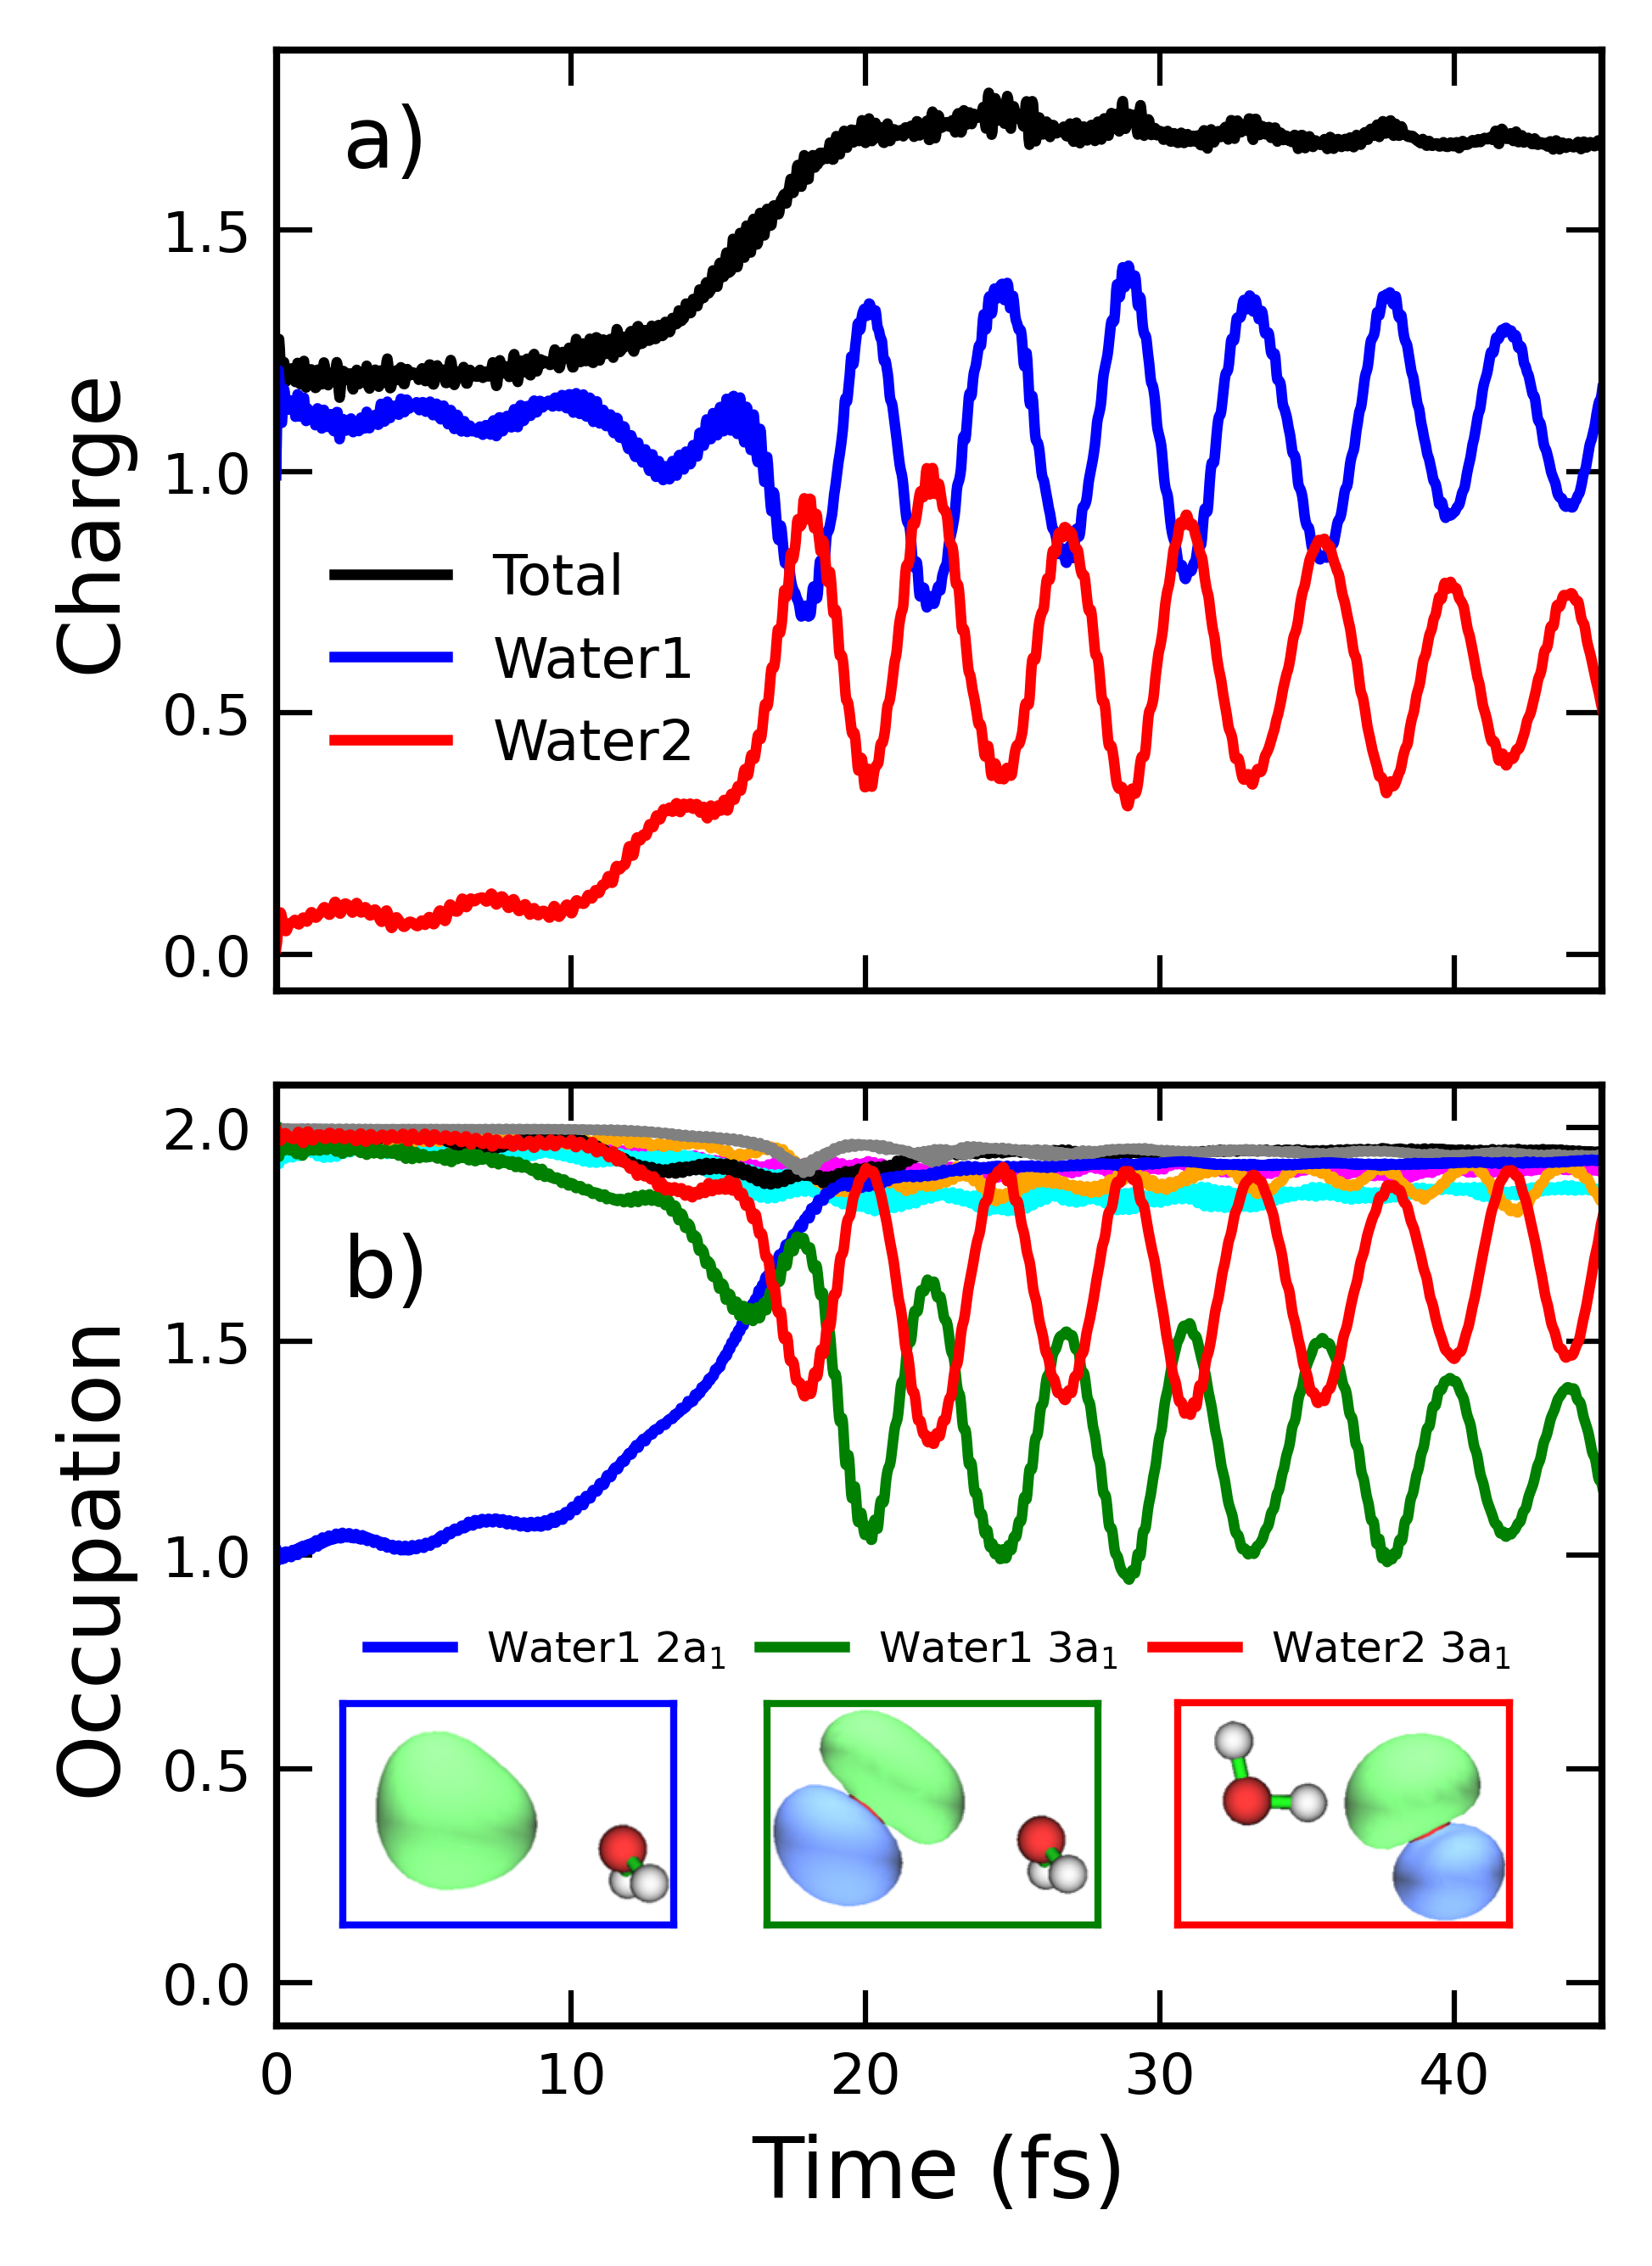

In [29]:
def Water_ICD():
    filename = 'TiDES_OUTPUTS/ICD/water_PD_ionize.out'

    result = parse_output(filename)
    
    time = result['time']
    moocc = result['mo_occ']
    
    fig, axs = plt.subplots(2,1, figsize=(3.36, 2.52*2), dpi=600, sharex=True)
    plt.subplots_adjust(hspace=0.1)
    axs[0].tick_params(labelsize=8, which='both',direction='in', top=True, right=True)
    axs[0].yaxis.set_major_locator(MultipleLocator(0.5))
    axs[0].plot(time / 41.34, 20 - moocc[:,:10].sum(axis=1), linewidth=1.5, c='k', label='Total')#'W1 2a1')#'PA 2a1')
    axs[0].plot(time / 41.34, 10 - moocc[:,:5].sum(axis=1), linewidth=1.5, c='b', label='Water1')#'W1 2a1')#'PA 2a1')
    axs[0].plot(time / 41.34, 10 - moocc[:,5:10].sum(axis=1), linewidth=1.5, c='r', label='Water2')#'W1 "Valence"')#'PA "Valence"')

    axs[0].set_xlim([0,45])
    #axs[0].set_ylim([1.94,2.25])

    axs[0].text(0.05, 0.9, 'a)', fontsize=12, va='center', transform=axs[0].transAxes)
    axs[0].legend(fontsize=8, loc='center', bbox_to_anchor=(.18, .35), frameon=False)
    axs[0].set_ylabel('Charge', fontsize=12)
    

    axs[1].tick_params(labelsize=8, which='both',direction='in', top=True, right=True)

    axs[1].yaxis.set_major_locator(MultipleLocator(0.5))
    axs[1].plot(time / 41.34, moocc[:,2], linewidth=1.5, c='magenta')#'W2 1b2')#'PD 1b2')

    axs[1].plot(time / 41.34, moocc[:,4], linewidth=1.5, c='cyan')#'W2 1b1')#'PD 1b1')
    axs[1].plot(time / 41.34, moocc[:,9], linewidth=1.5, c='orange')#'W1 1b1')#'PA 1b1')
    axs[1].plot(time / 41.34, moocc[:,6], linewidth=1.5, c='black')#'W1 2a1')#'PA 2a1')
    axs[1].plot(time / 41.34, moocc[:,7], linewidth=1.5, c='gray')#'W1 1b2')#'PA 1b2')


    axs[1].plot(time / 41.34, moocc[:,1], linewidth=1.5, c='blue', label=r'Water1 $\mathrm{2a_1}$')#'W2 2a1')#'PD 2a1')
    axs[1].plot(time / 41.34, moocc[:,3], linewidth=1.5, c='green', label=r'Water1 $\mathrm{3a_1}$')#'W2 3a1')#'PD 3a1')

    axs[1].plot(time / 41.34, moocc[:,8], linewidth=1.5, c='red', label=r'Water2 $\mathrm{3a_1}$')#'W1 3a1')#'PA 3a1')

    axs[1].set_xlabel('Time (fs)', fontsize=12)
    axs[1].set_ylabel('Occupation', fontsize=12)

    axs[1].set_xlim([0,45])
    axs[1].set_ylim([-.1,2.1])
    #axs[1].set_ylim([2.22,2.55])
    axs[1].text(0.05, 0.8, 'b)', fontsize=12, va='center', transform=axs[1].transAxes)
    axs[1].legend(fontsize=6, loc='center', bbox_to_anchor=(.5, .4), frameon=False, ncols=3, columnspacing=0.8)

    #w1_2a1_image = plt.imread('PNG_INPUTS/Water12a1.png', format='png')
    #w1_3a1_image = plt.imread('PNG_INPUTS/Water13a1.png', format='png')
    #w2_3a1_image = plt.imread('PNG_INPUTS/Water23a1.png', format='png')
    
    #axin = axs[1].inset_axes([0.05,0.05,0.25,0.35], transform=axs[1].transAxes)    # create new inset axes in data coordinates
    #axin.tick_params(left=False, bottom=False, top=False, right=False)
    #axin.set_xticks([])
    #axin.set_yticks([])
    #axin.spines['top'].set_visible(True)
    #axin.spines['top'].set_color('blue')
    #axin.spines['bottom'].set_visible(True)
    #axin.spines['bottom'].set_color('blue')
    #axin.spines['left'].set_visible(True)
    #axin.spines['left'].set_color('blue')
    #axin.spines['right'].set_visible(True)
    #axin.spines['right'].set_color('blue')
    #axin.imshow(w1_2a1_image)

    #axin = axs[1].inset_axes([0.37,0.05,0.25,0.35], transform=axs[1].transAxes)    # create new inset axes in data coordinates
    #axin.tick_params(left=False, bottom=False, top=False, right=False)
    #axin.set_xticks([])
    #axin.set_yticks([])
    #axin.spines['top'].set_visible(True)
    #axin.spines['top'].set_color('green')
    #axin.spines['bottom'].set_visible(True)
    #axin.spines['bottom'].set_color('green')
    #axin.spines['left'].set_visible(True)
    #axin.spines['left'].set_color('green')
    #axin.spines['right'].set_visible(True)
    #axin.spines['right'].set_color('green')
    #axin.imshow(w1_3a1_image)

    #axin = axs[1].inset_axes([0.68,0.05,0.25,0.35], transform=axs[1].transAxes)    # create new inset axes in data coordinates
    #axin.tick_params(left=False, bottom=False, top=False, right=False)
    #axin.set_xticks([])
    #axin.set_yticks([])
    #axin.spines['top'].set_visible(True)
    #axin.spines['top'].set_color('red')
    #axin.spines['bottom'].set_visible(True)
    #axin.spines['bottom'].set_color('red')
    #axin.spines['left'].set_visible(True)
    #axin.spines['left'].set_color('red')
    #axin.spines['right'].set_visible(True)
    #axin.spines['right'].set_color('red')
    #axin.imshow(w2_3a1_image)
    
    #plt.savefig('PNG_OUTPUTS/Water_ICD.png', bbox_inches='tight')


Water_ICD()

In [9]:
def parse_bomd(filename, mol_length=2):
    '''
    Simple script that parses pyscf BOMD.out file
    '''

    def get_xyz(lines):
        xyz = []
        for line in lines:
            atom_xyz = []
            for i in range(1,4):
                atom_xyz.append(float(line.split()[i+1]))
            xyz.append(atom_xyz)
        return xyz

    with open(filename, 'r') as f:
        lines = f.readlines()

    time = []
    coords = []

    for idx, line in enumerate(lines):
        if 'BOMD Time' in line:
            time.append(float(line.split()[2]))
        if '----------- VelocityVerlet final geometry -----------' in line:
            coords.append(get_xyz(lines[idx+2:idx+mol_length+2]))

    time = np.array(time)
    coords = lib.param.BOHR * np.array(coords)
    result = {
    'time': time,
    'coords': coords,
    }
    return result

def get_results(filename):
    result = parse_output(filename)
    time = result['time']
    coords = result['coords']
    dist = get_length(coords, [1,2])
    return time, dist
        
def get_bomd(filename):
    result = parse_bomd(filename)
    time = result['time']
    coords = result['coords']
    dist = get_length(coords, [1,2])
    max_indx = min(time.shape[0], len(dist))
    return time[:max_indx], dist[:max_indx]

    
time0_G, _0ev_G = get_results('TiDES_OUTPUTS/Ehrenfest/6-31G/0eV/cl2.out')
time1_G, _1ev_G = get_results('TiDES_OUTPUTS/Ehrenfest/6-31G/1eV/cl2.out')
time2_G, _2ev_G = get_results('TiDES_OUTPUTS/Ehrenfest/6-31G/2eV/cl2.out')
time3_G, _3ev_G = get_results('TiDES_OUTPUTS/Ehrenfest/6-31G/3eV/cl2.out')
#time0_G_bomd, _0ev_G_bomd = get_bomd('SUPPLEMENTAL_OUTPUTS/Cl2_BOMD/6-31G/0eV/cl2_bomd.out')
#time1_G_bomd, _1ev_G_bomd = get_bomd('SUPPLEMENTAL_OUTPUTS/Cl2_BOMD/6-31G/1eV/cl2_bomd.out')
#time2_G_bomd, _2ev_G_bomd = get_bomd('SUPPLEMENTAL_OUTPUTS/Cl2_BOMD/6-31G/2eV/cl2_bomd.out')
#time3_G_bomd, _3ev_G_bomd = get_bomd('SUPPLEMENTAL_OUTPUTS/Cl2_BOMD/6-31G/3eV/cl2_bomd.out')
    
time0_Gs, _0ev_Gs = get_results('TiDES_OUTPUTS/Ehrenfest/6-31G_Star/0eV/cl2.out')
time1_Gs, _1ev_Gs = get_results('TiDES_OUTPUTS/Ehrenfest/6-31G_Star/1eV/cl2.out')
time2_Gs, _2ev_Gs = get_results('TiDES_OUTPUTS/Ehrenfest/6-31G_Star/2eV/cl2.out')
time3_Gs, _3ev_Gs = get_results('TiDES_OUTPUTS/Ehrenfest/6-31G_Star/3eV/cl2.out')
#time0_Gs_bomd, _0ev_Gs_bomd = get_bomd('SUPPLEMENTAL_OUTPUTS/Cl2_BOMD/6-31G_Star/0eV/cl2_bomd.out')
#time1_Gs_bomd, _1ev_Gs_bomd = get_bomd('SUPPLEMENTAL_OUTPUTS/Cl2_BOMD/6-31G_Star/1eV/cl2_bomd.out')
#time2_Gs_bomd, _2ev_Gs_bomd = get_bomd('SUPPLEMENTAL_OUTPUTS/Cl2_BOMD/6-31G_Star/2eV/cl2_bomd.out')
#time3_Gs_bomd, _3ev_Gs_bomd = get_bomd('SUPPLEMENTAL_OUTPUTS/Cl2_BOMD/6-31G_Star/3eV/cl2_bomd.out')


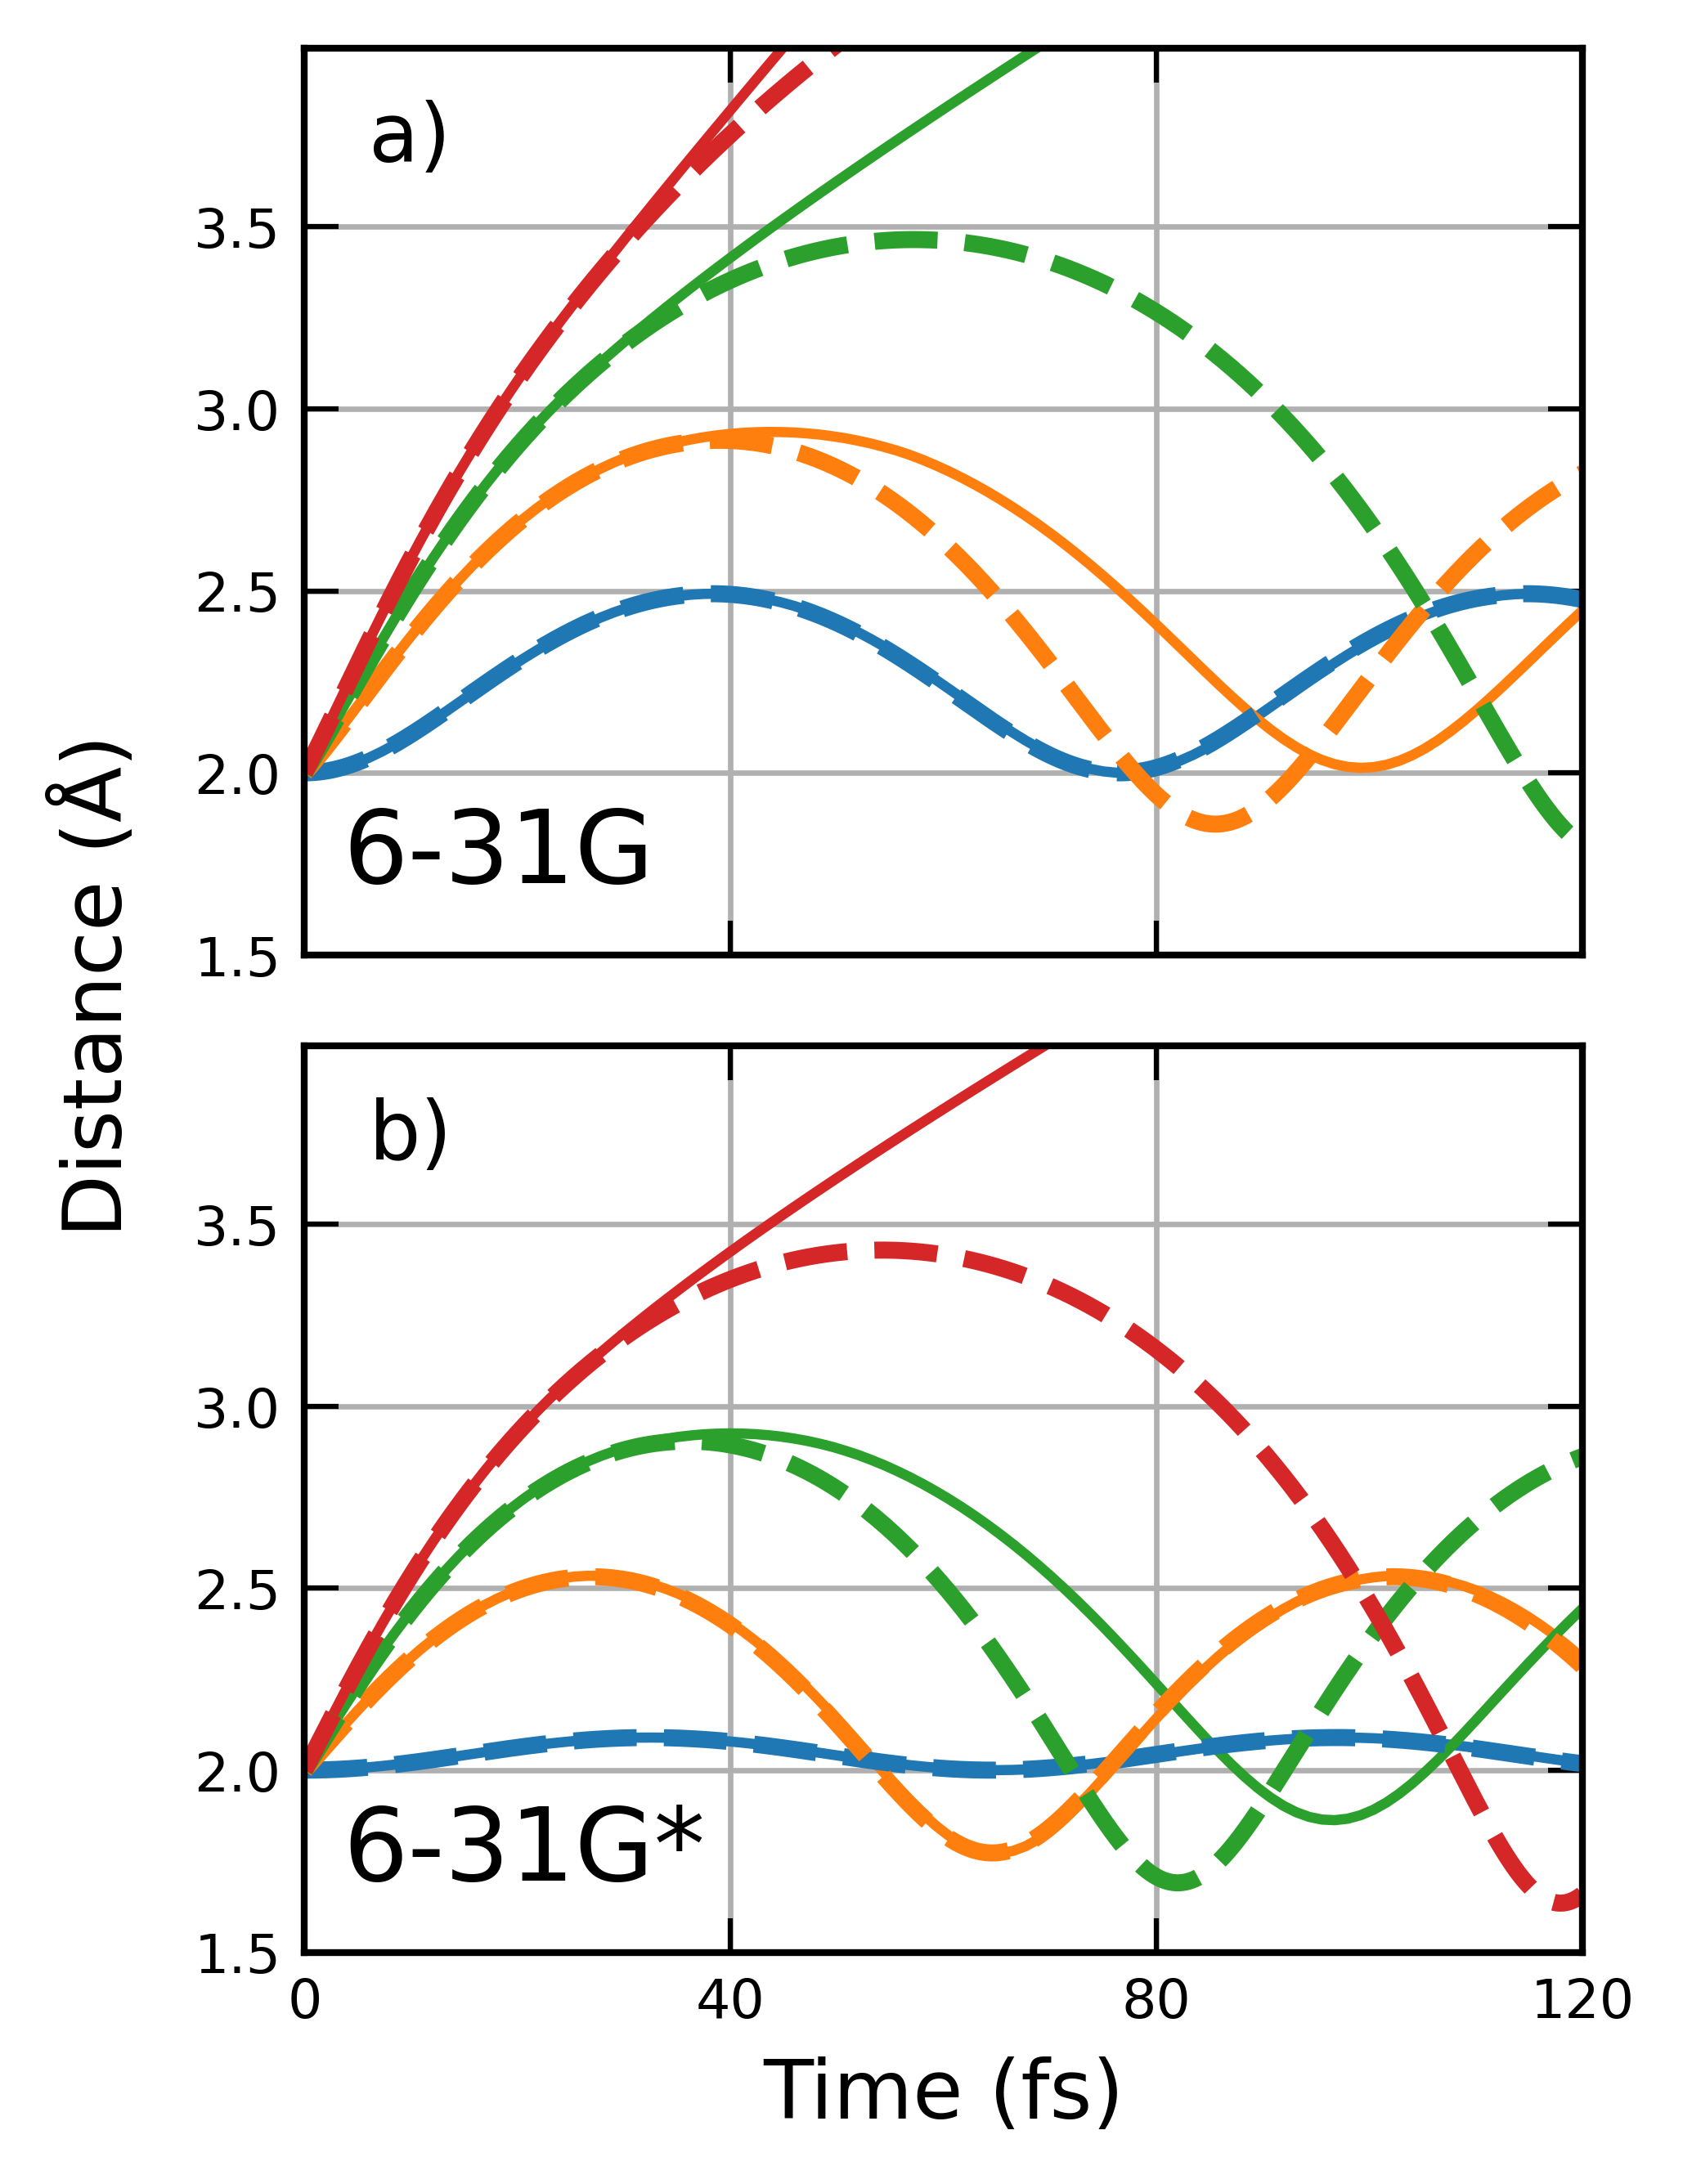

In [31]:
def Cl2_Dissociation():

    fig, axs = plt.subplots(2,1, figsize=(3.36, 2.52*2), dpi=600, sharex=True)
    plt.subplots_adjust(hspace=0.1)
    axs[0].grid(True)
    axs[0].tick_params(labelsize=8, which='both',direction='in', top=True, right=True)
    axs[0].plot(time0_G / 41.34, _0ev_G, 'C0', linewidth=1.5, label='0')
    axs[0].plot(time1_G / 41.34, _1ev_G, 'C1', linewidth=1.5, label='1')
    axs[0].plot(time2_G / 41.34, _2ev_G, 'C2', linewidth=1.5, label='2')
    axs[0].plot(time3_G / 41.34, _3ev_G, 'C3', linewidth=1.5, label='3')

    #axs[0].plot(time0_G_bomd / 41.34, _0ev_G_bomd, 'C0', linestyle='dashed', linewidth=2.5)
    #axs[0].plot(time1_G_bomd / 41.34, _1ev_G_bomd, 'C1', linestyle='dashed', linewidth=2.5)
    #axs[0].plot(time2_G_bomd / 41.34, _2ev_G_bomd, 'C2', linestyle='dashed', linewidth=2.5)
    #axs[0].plot(time3_G_bomd / 41.34, _3ev_G_bomd, 'C3', linestyle='dashed', linewidth=2.5)

    axs[0].yaxis.set_major_locator(MultipleLocator(0.5))
    axs[0].xaxis.set_major_locator(MultipleLocator(40))

    axs[0].set_xlim([0,120])
    axs[0].set_ylim([1.5,3.99])
    axs[0].text(0.05, 0.9, 'a)', fontsize=12, va='center', transform=axs[0].transAxes)
    #axs[0].legend(title='          Initial\nKinetic Energy (eV)', facecolor='white', title_fontsize=12,fontsize=12, loc='upper center', bbox_to_anchor=(0.8, 1.0), fancybox=False, framealpha=1., edgecolor='inherit')
    axs[0].text(0.03, .08, '6-31G', fontsize=15, transform=axs[0].transAxes)
    
    axs[1].grid(True)
    axs[1].tick_params(labelsize=8, which='both',direction='in', top=True, right=True)
    axs[1].plot(time0_Gs / 41.34, _0ev_Gs, 'C0', linewidth=1.5, label='0')
    axs[1].plot(time1_Gs / 41.34, _1ev_Gs, 'C1', linewidth=1.5, label='1')
    axs[1].plot(time2_Gs / 41.34, _2ev_Gs, 'C2', linewidth=1.5, label='2')
    axs[1].plot(time3_Gs / 41.34, _3ev_Gs, 'C3', linewidth=1.5, label='3')

    #axs[1].plot(time0_Gs_bomd / 41.34, _0ev_Gs_bomd, 'C0', linestyle='dashed', linewidth=2.5)
    #axs[1].plot(time1_Gs_bomd / 41.34, _1ev_Gs_bomd, 'C1', linestyle='dashed', linewidth=2.5)
    #axs[1].plot(time2_Gs_bomd / 41.34, _2ev_Gs_bomd, 'C2', linestyle='dashed', linewidth=2.5)
    #axs[1].plot(time3_Gs_bomd / 41.34, _3ev_Gs_bomd, 'C3', linestyle='dashed', linewidth=2.5)

    axs[1].yaxis.set_major_locator(MultipleLocator(0.5))
    axs[1].xaxis.set_major_locator(MultipleLocator(40))
    axs[1].set_xlabel('Time (fs)', fontsize=12)
    #axs[1].set_yticklabels([])
    axs[1].set_xlim([0,120])
    axs[1].set_ylim([1.5,3.99])
    axs[1].text(0.05, 0.9, 'b)', fontsize=12, va='center', transform=axs[1].transAxes)
    #axs[1].legend(title='          Initial\nKinetic Energy (eV)', facecolor='white', title_fontsize=12,fontsize=12, loc='upper center', bbox_to_anchor=(0.8, 1.0), fancybox=False, framealpha=1., edgecolor='inherit')
    axs[1].text(0.03, .08, r'6-31G*', fontsize=15, transform=axs[1].transAxes)
    fig.text(-0.03, 0.5, r'Distance ($\mathrm{\AA}$)', fontsize=12, va='center', rotation='vertical')

    #plt.savefig('PNG_OUTPUTS/Cl2_Dissociation.png', bbox_inches='tight')

Cl2_Dissociation()

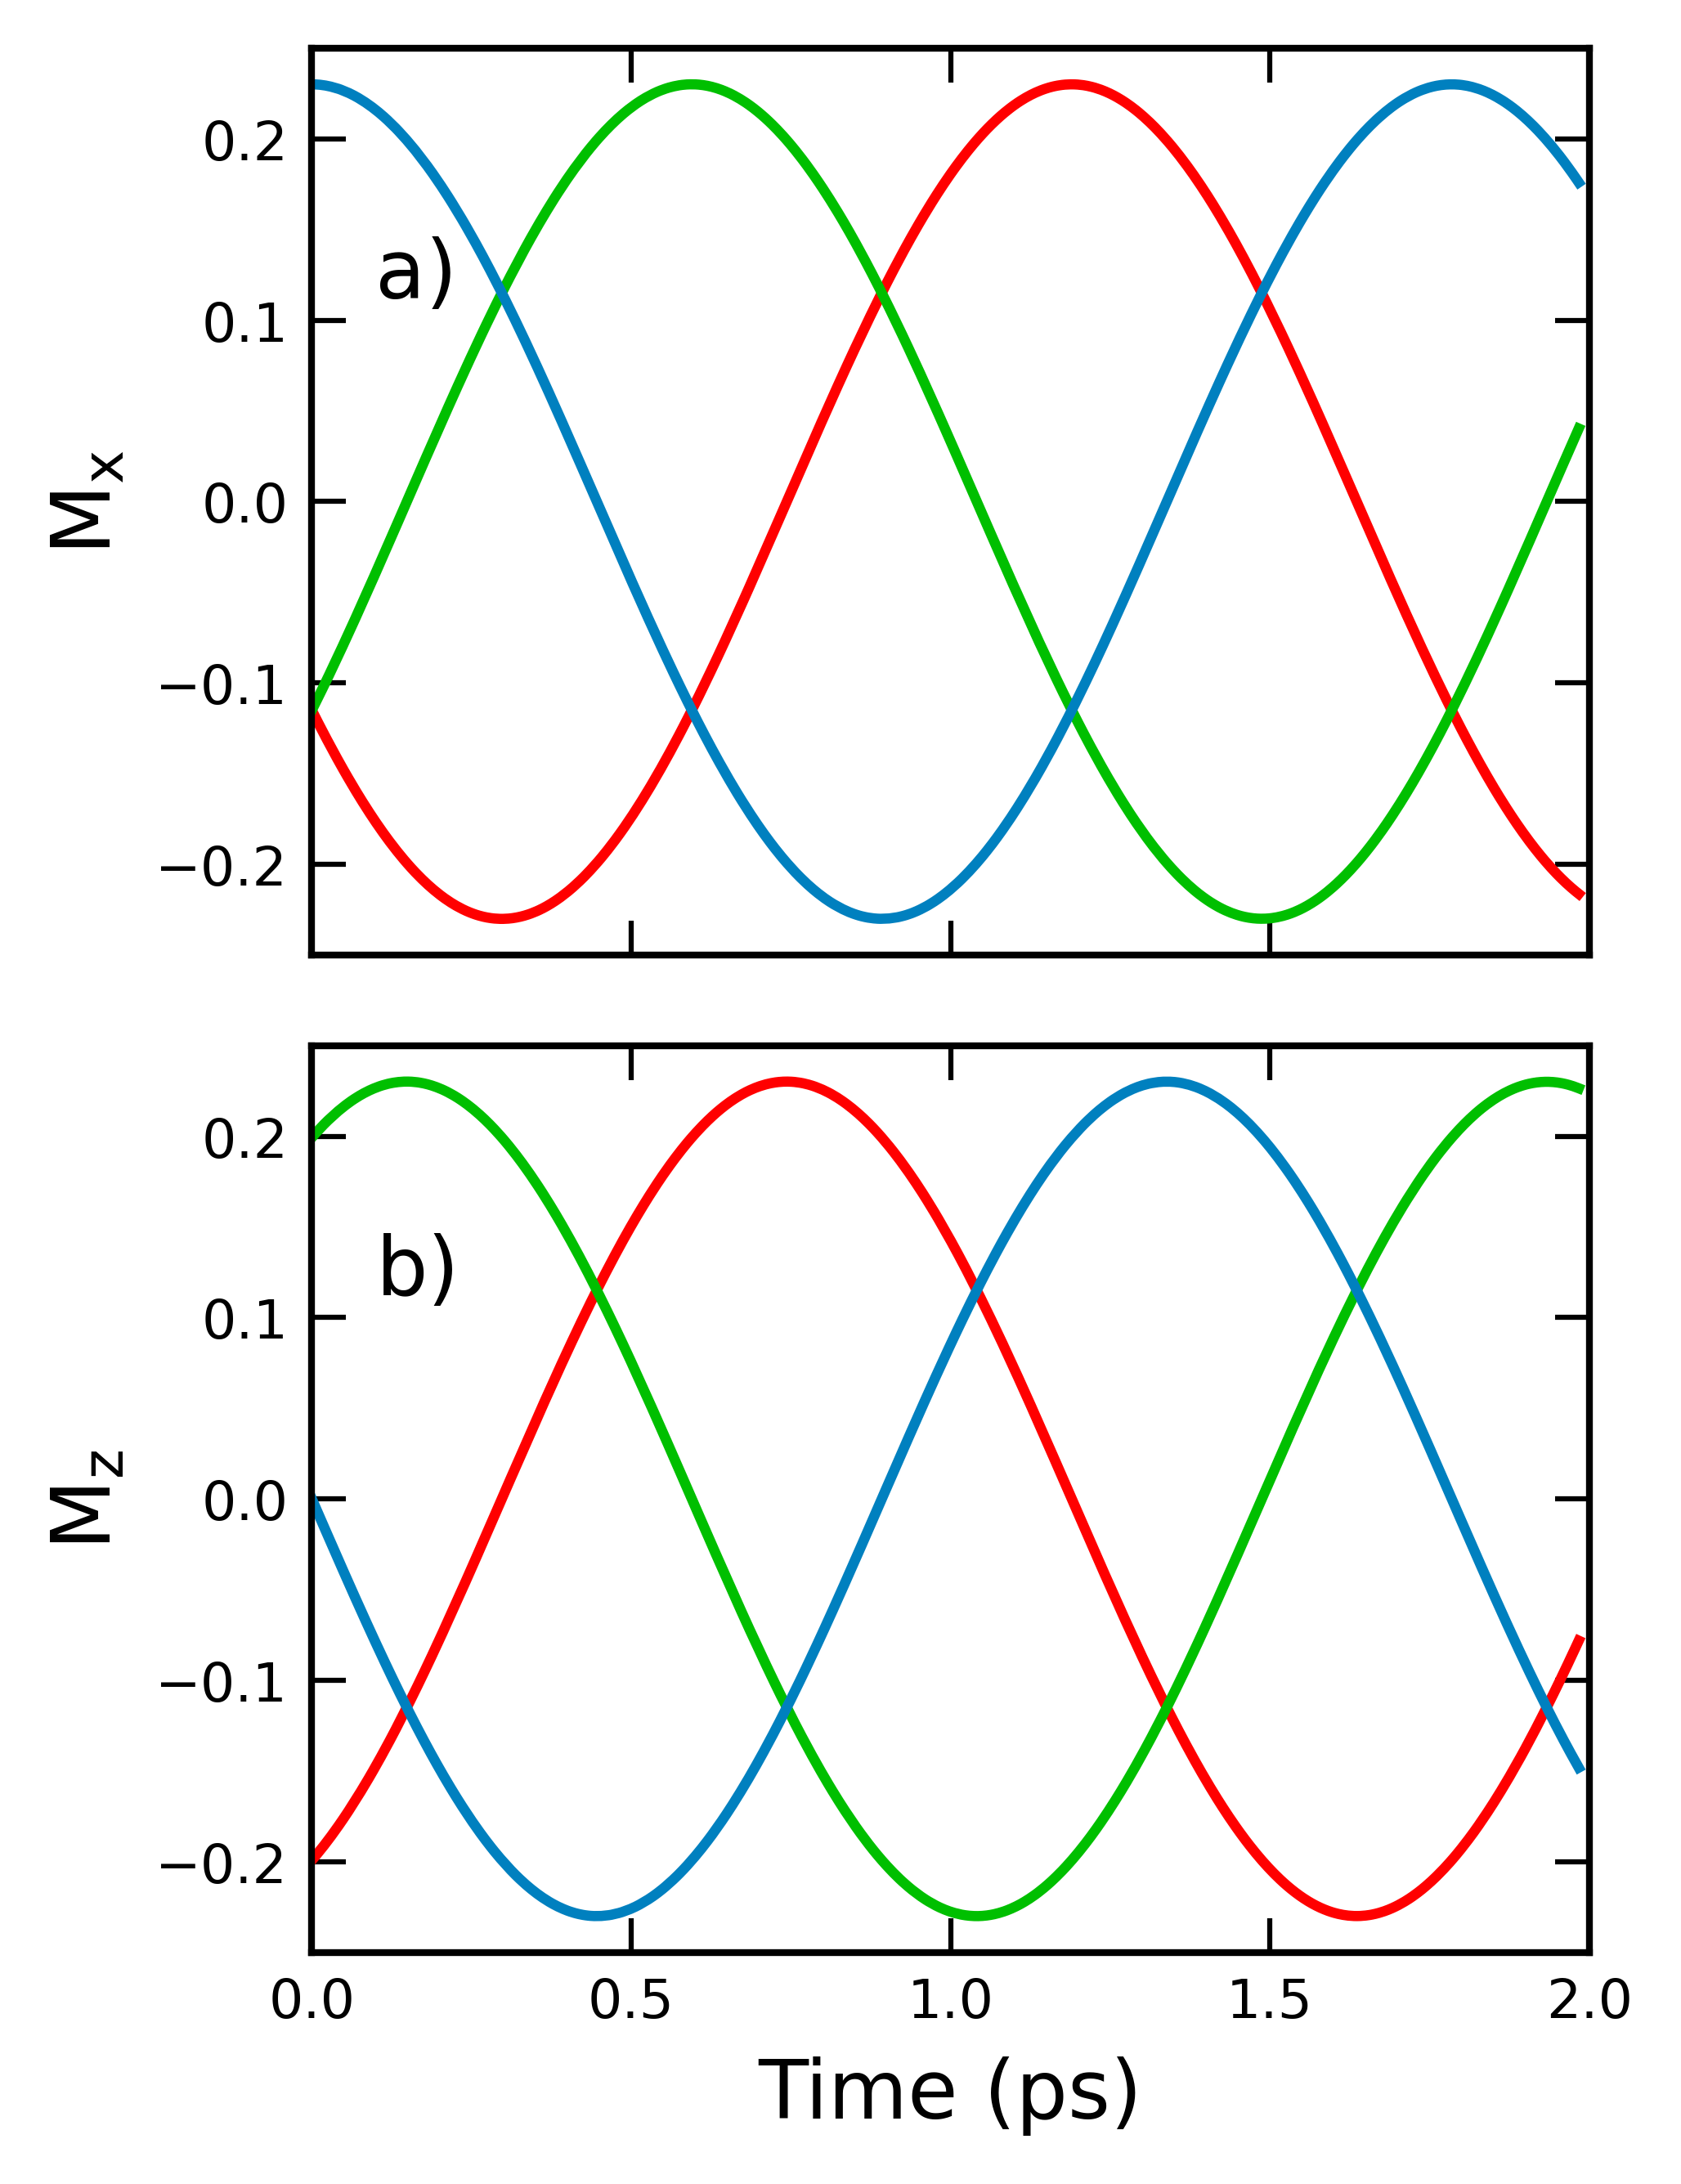

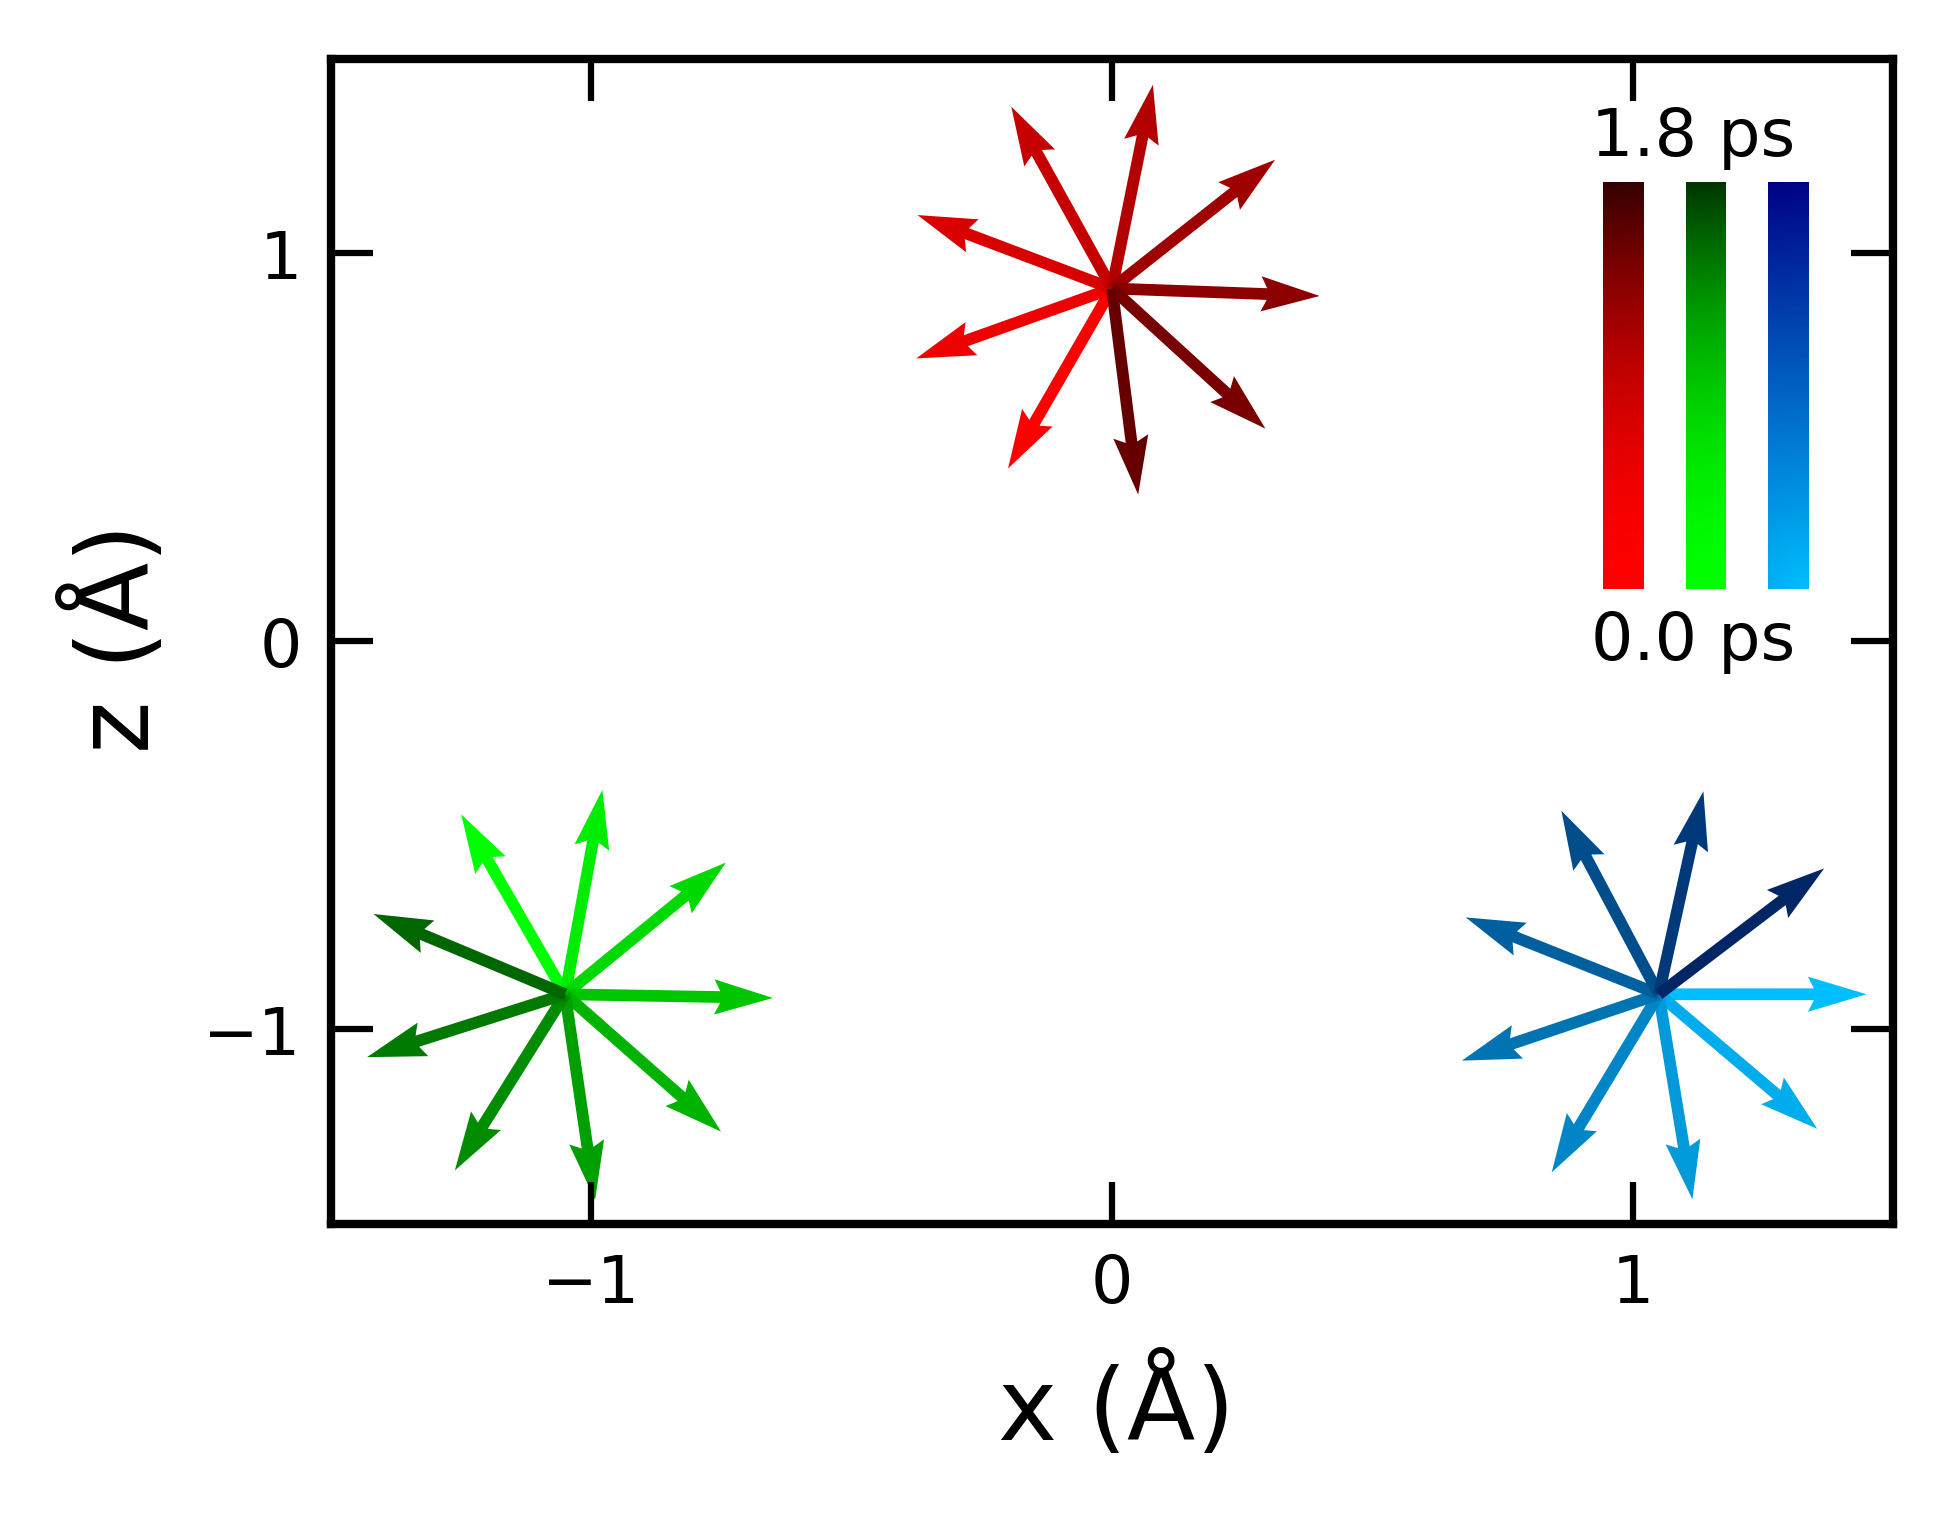

In [32]:
def lithium_trimer():
    filename = 'TiDES_OUTPUTS/SpinDynamics/li_trimer.out'
    result = parse_output(filename)
    time = result['time']
    atom_mag = result['hirsh_mag']
    
    fig, axs = plt.subplots(2,1, figsize=(3.36, 2.52*2), dpi=600, sharex=True)
    plt.subplots_adjust(hspace=0.1)
    #axs[0].grid(True)
    axs[0].tick_params(labelsize=8, which='both',direction='in', top=True, right=True)
    axs[0].plot(time / 41340, atom_mag[:,0,0], color=[1,0,0], linewidth=1.5)
    axs[0].plot(time / 41340, atom_mag[:,1,0], color=[0,0.75,0], linewidth=1.5)
    axs[0].plot(time / 41340, atom_mag[:,2,0], color=[0,0.5,0.75], linewidth=1.5)
    axs[0].yaxis.set_major_locator(MultipleLocator(0.1))

    axs[0].text(0.05, 0.75, 'a)', fontsize=12, va='center', transform=axs[0].transAxes)
    axs[0].set_ylabel(r'$\mathrm{M_x}$', fontsize=12)
    #axs[0].set_yticklabels([])
    axs[0].set_xlim([0,2])
    axs[0].set_ylim([-0.25,0.25])
    #axs[0].text(0.08, .2, r'$\mathrm{M_x}$', fontsize=25, transform=axs[0].transAxes)
    
    #axs[1].grid(True)
    axs[1].tick_params(labelsize=8, which='both',direction='in', top=True, right=True)
    axs[1].plot(time / 41340, atom_mag[:,0,2], color=[1,0,0], linewidth=1.5)
    axs[1].plot(time / 41340, atom_mag[:,1,2], color=[0,0.75,0], linewidth=1.5)
    axs[1].plot(time / 41340, atom_mag[:,2,2], color=[0,0.5,0.75], linewidth=1.5)
    axs[1].yaxis.set_major_locator(MultipleLocator(0.1))
    
    axs[1].set_xlabel('Time (ps)', fontsize=12)
    axs[1].set_ylabel(r'$\mathrm{M_z}$', fontsize=12)
    
    axs[1].text(0.05, 0.75, 'b)', fontsize=12, va='center', transform=axs[1].transAxes)
    #axs[1].set_yticklabels([])
    axs[1].set_xlim([0,2])
    axs[1].set_ylim([-0.25,0.25])
   
    #axs[1].text(0.08, .2, r'$\mathrm{M_z}$', fontsize=25, transform=axs[1].transAxes)
    #fig.text(-0.03, 0.5, 'Magnetization (au)', fontsize=20, va='center', rotation='vertical')

    #plt.savefig('PNG_OUTPUTS/LiTrimer_mags.png', bbox_inches='tight')

    times = np.arange(0, 72000, 8268)
    
    m1 = atom_mag[:,:,0]
    m2 = atom_mag[:,:,2]
    plt.figure(figsize=(3.36, 2.52), dpi=600)
    ax = plt.axes()
    ax.tick_params(labelsize=8, which='both',direction='in', top=True, right=True)
    ax.xaxis.set_major_locator(MultipleLocator(1.))
    ax.yaxis.set_major_locator(MultipleLocator(1.))
    for idx, t in enumerate(times):
        plt.quiver(0.0, 0.909326674, m1[t*2,0], m2[t*2,0], color=[1-idx*0.075,0,0], scale=np.linalg.norm(atom_mag[t,0,:])+1.5, headlength=5)
        plt.quiver(-1.05, -0.909326674, m1[t*2,1], m2[t*2,1], color=[0,1-idx*0.075,0], scale=np.linalg.norm(atom_mag[t,0,:])+1.5, headlength=5)
        plt.quiver(1.05, -0.909326674, m1[t*2,2], m2[t*2,2], color=[0,0.75-idx*0.075,1-idx*0.075], scale=np.linalg.norm(atom_mag[t,0,:])+1.5, headlength=5)

    #plt.legend(bbox_to_anchor=(1.25,1.0))
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    plt.text(.92, 0.0, '0.0 ps', fontsize=8, va='center')
    plt.text(.92, 1.3, '1.8 ps', fontsize=8, va='center')

    #arr_image = plt.imread('PNG_INPUTS/QuiverLabel.png', format='png')


    #axin = ax.inset_axes([0.805,0.545,0.15,0.35],transform=ax.transAxes)    # create new inset axes in data coordinates
    #axin.tick_params(left=False, bottom=False, top=False, right=False)
    #axin.set_xticks([])
    #axin.set_yticks([])
    #axin.spines['top'].set_visible(False)
    #axin.spines['bottom'].set_visible(False)
    #axin.spines['left'].set_visible(False)
    #axin.spines['right'].set_visible(False)
    #axin.imshow(arr_image)

    plt.xlabel(r'x ($\mathrm{\AA}$)', fontsize=12)
    plt.ylabel(r'z ($\mathrm{\AA}$)', fontsize=12)
    #plt.savefig('PNG_OUTPUTS/LiTrimer_Quiver.png', bbox_inches='tight')
    
lithium_trimer()